<a href="https://colab.research.google.com/github/bhatnira/Acetylcholinesterase-Inhibitor-Top-Model-Regression-Modeling/blob/main/regressionModeling_RDKitFeatures.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1. RDKit Feature Based Regression Modelling

## Introduction

Rdkit Features: RDKiT descriptor are easy to calculate descriptors open-sourced under rdkit.Chem.Descriptor modules by RDKit (Rdkit.Chem.Descriptors Module, 2024). Check out documentation here:  [Rdkit Descriptor Module](https://rdkit.org/docs/source/rdkit.Chem.Descriptors.html)

## Data loading and Preprocessing



In [ ]:
# Tpot requires numpy==1.23.3 as of june 2024
!pip install numpy==1.23.3


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.1/17.1 MB 7.6 MB/s eta 0:00:00
  Attempting uninstall: numpy
    Found existing installation: numpy 1.25.2
    Uninstalling numpy-1.25.2:
      Successfully uninstalled numpy-1.25.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
chex 0.1.86 requires numpy>=1.24.1, but you have numpy 1.23.3 which is incompatible.
pandas-stubs 2.0.3.230814 requires numpy>=1.25.0; python_version >= "3.9", but you have numpy 1.23.3 which is incompatible.
tensorflow 2.15.0 requires numpy<2.0.0,>=1.23.5, but you have numpy 1.23.3 which is incompatible.


In [ ]:
# For Reporducibility
import numpy as np
np.random.seed(42)


In [ ]:
# Mount Drive in Colab environment
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


### Data loading

In [ ]:
# Load dataset
import pandas as pd
df=pd.read_excel('/content/drive/MyDrive/Predictive-Generative-transfer learning/Part_2_standarizationOfMolecule/StandarizedSmiles_cutOFF800daltonMolecularweight.xlsx')
df.head(5)

,Molecule ChEMBL ID,Smiles,IC50,classLabel,IsValidSMILES,Morgan_FP,Molecule,Fingerprint,PCA1,PCA2,tSNE1,tSNE2,MolecularWeight,Frequency,cleanedMol
0,CHEMBL94,CNC(=O)Oc1ccc2c(c1)[C@]1(C)CCN(C)[C@@H]1N2C,28.0,1,True,<rdkit.DataStructs.cDataStructs.ExplicitBitVec...,<rdkit.Chem.rdchem.Mol object at 0x7bcfd8e880b0>,<rdkit.DataStructs.cDataStructs.ExplicitBitVec...,-1.738898,-1.494784,-52.761700,-42.736099,275.352,27,CNC(=O)Oc1ccc2c(c1)[C@]1(C)CCN(C)[C@@H]1N2C
1,CHEMBL207777,Cc1ccccc1NC(=O)Oc1ccc2c(c1)[C@]1(C)CO[C@@H](C1)O2,97.0,1,True,<rdkit.DataStructs.cDataStructs.ExplicitBitVec...,<rdkit.Chem.rdchem.Mol object at 0x7bcfd8e88190>,<rdkit.DataStructs.cDataStructs.ExplicitBitVec...,-1.014164,-1.325272,-63.027809,-53.765778,325.364,1,Cc1ccccc1NC(=O)Oc1ccc2c(c1)[C@]1(C)CO[C@@H](C1)O2
2,CHEMBL205967,CCNC(=O)Oc1ccc2c(c1)[C@]1(C)CO[C@@H](C1)O2,2420.0,0,True,<rdkit.DataStructs.cDataStructs.ExplicitBitVec...,<rdkit.Chem.rdchem.Mol object at 0x7bcfd8e88270>,<rdkit.DataStructs.cDataStructs.ExplicitBitVec...,-1.235565,-1.559108,-61.968063,-54.078575,263.293,1,CCNC(=O)Oc1ccc2c(c1)[C@]1(C)CO[C@@H](C1)O2
3,CHEMBL60119,Cc1ccc2c(N)c3c(nc2c1)CCCC3,100.0,1,True,<rdkit.DataStructs.cDataStructs.ExplicitBitVec...,<rdkit.Chem.rdchem.Mol object at 0x7bcfd8e88430>,<rdkit.DataStructs.cDataStructs.ExplicitBitVec...,2.705664,0.148113,57.758297,-8.911607,212.296,4,Cc1ccc2c(N)c3c(nc2c1)CCCC3
4,CHEMBL294525,CCCCCCCNc1c2c(nc3cc([N+](=O)[O-])ccc13)CCCC2,290.0,1,True,<rdkit.DataStructs.cDataStructs.ExplicitBitVec...,<rdkit.Chem.rdchem.Mol object at 0x7bcfd8e884a0>,<rdkit.DataStructs.cDataStructs.ExplicitBitVec...,3.600017,-0.978574,61.242554,5.783804,341.455,3,CCCCCCCNc1c2c(nc3cc([N+](=O)[O-])ccc13)CCCC2


In [ ]:
# Calculating negative pIC50
df['pIC50']=np.log10(df['IC50'])


In [ ]:
df

,Molecule ChEMBL ID,Smiles,IC50,classLabel,IsValidSMILES,Morgan_FP,Molecule,Fingerprint,PCA1,PCA2,tSNE1,tSNE2,MolecularWeight,Frequency,cleanedMol,pIC50
0,CHEMBL94,CNC(=O)Oc1ccc2c(c1)[C@]1(C)CCN(C)[C@@H]1N2C,28.00,1,True,<rdkit.DataStructs.cDataStructs.ExplicitBitVec...,<rdkit.Chem.rdchem.Mol object at 0x7bcfd8e880b0>,<rdkit.DataStructs.cDataStructs.ExplicitBitVec...,-1.738898,-1.494784,-52.761700,-42.736099,275.352,27,CNC(=O)Oc1ccc2c(c1)[C@]1(C)CCN(C)[C@@H]1N2C,1.447158
1,CHEMBL207777,Cc1ccccc1NC(=O)Oc1ccc2c(c1)[C@]1(C)CO[C@@H](C1)O2,97.00,1,True,<rdkit.DataStructs.cDataStructs.ExplicitBitVec...,<rdkit.Chem.rdchem.Mol object at 0x7bcfd8e88190>,<rdkit.DataStructs.cDataStructs.ExplicitBitVec...,-1.014164,-1.325272,-63.027809,-53.765778,325.364,1,Cc1ccccc1NC(=O)Oc1ccc2c(c1)[C@]1(C)CO[C@@H](C1)O2,1.986772
2,CHEMBL205967,CCNC(=O)Oc1ccc2c(c1)[C@]1(C)CO[C@@H](C1)O2,2420.00,0,True,<rdkit.DataStructs.cDataStructs.ExplicitBitVec...,<rdkit.Chem.rdchem.Mol object at 0x7bcfd8e88270>,<rdkit.DataStructs.cDataStructs.ExplicitBitVec...,-1.235565,-1.559108,-61.968063,-54.078575,263.293,1,CCNC(=O)Oc1ccc2c(c1)[C@]1(C)CO[C@@H](C1)O2,3.383815
3,CHEMBL60119,Cc1ccc2c(N)c3c(nc2c1)CCCC3,100.00,1,True,<rdkit.DataStructs.cDataStructs.ExplicitBitVec...,<rdkit.Chem.rdchem.Mol object at 0x7bcfd8e88430>,<rdkit.DataStructs.cDataStructs.ExplicitBitVec...,2.705664,0.148113,57.758297,-8.911607,212.296,4,Cc1ccc2c(N)c3c(nc2c1)CCCC3,2.000000
4,CHEMBL294525,CCCCCCCNc1c2c(nc3cc([N+](=O)[O-])ccc13)CCCC2,290.00,1,True,<rdkit.DataStructs.cDataStructs.ExplicitBitVec...,<rdkit.Chem.rdchem.Mol object at 0x7bcfd8e884a0>,<rdkit.DataStructs.cDataStructs.ExplicitBitVec...,3.600017,-0.978574,61.242554,5.783804,341.455,3,CCCCCCCNc1c2c(nc3cc([N+](=O)[O-])ccc13)CCCC2,2.462398
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4072,CHEMBL4077157,O=C(Nc1ccc(CN2CCOCC2)cc1C(=O)C(=O)N1C(=O)CCC1=...,229.08,1,True,<rdkit.DataStructs.cDataStructs.ExplicitBitVec...,<rdkit.Chem.rdchem.Mol object at 0x7bcfdd327c30>,<rdkit.DataStructs.cDataStructs.ExplicitBitVec...,-0.478199,1.261641,-6.948340,22.359066,449.463,1,O=C(Nc1ccc(CN2CCOCC2)cc1C(=O)C(=O)n1c(O)ccc1O)...,2.359987
4073,CHEMBL3906317,COc1cccc2c1C=[N+](c1ccccc1C(F)(F)F)CC2.[Br-],10000.00,0,True,<rdkit.DataStructs.cDataStructs.ExplicitBitVec...,<rdkit.Chem.rdchem.Mol object at 0x7bcfdd327ca0>,<rdkit.DataStructs.cDataStructs.ExplicitBitVec...,-0.671263,-0.016301,-2.058204,-20.779112,386.211,1,COc1cccc2c1C=[N+](c1ccccc1C(F)(F)F)CC2,4.000000
4074,CHEMBL4800328,COc1cccc2cc[n+](-c3ccc(C)cc3)cc12.[Br-],1080.00,0,True,<rdkit.DataStructs.cDataStructs.ExplicitBitVec...,<rdkit.Chem.rdchem.Mol object at 0x7bcfdd327d10>,<rdkit.DataStructs.cDataStructs.ExplicitBitVec...,-0.586529,-0.433179,12.677232,-4.265130,330.225,1,COc1cccc2cc[n+](-c3ccc(C)cc3)cc12,3.033424
4075,CHEMBL4797670,COc1ccc(-[n+]2ccc3cccc(OC)c3c2)cc1.[Br-],140.00,1,True,<rdkit.DataStructs.cDataStructs.ExplicitBitVec...,<rdkit.Chem.rdchem.Mol object at 0x7bcfdd327d80>,<rdkit.DataStructs.cDataStructs.ExplicitBitVec...,-0.677524,-0.748477,12.681081,-4.258606,346.224,1,COc1ccc(-[n+]2ccc3cccc(OC)c3c2)cc1,2.146128


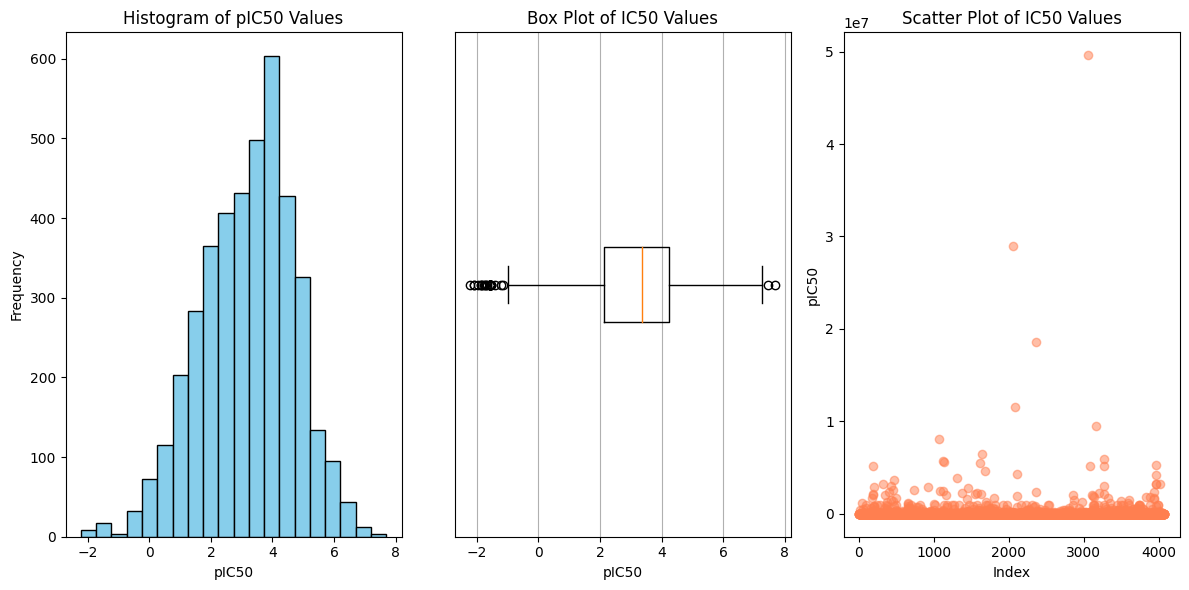

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats


#  Plot histogram, box plot, and scatter plot
plt.figure(figsize=(12, 6))

plt.subplot(1, 3, 1)
plt.hist(df['pIC50'], bins=20, color='skyblue', edgecolor='black')
plt.title('Histogram of pIC50 Values')
plt.xlabel('pIC50')
plt.ylabel('Frequency')

plt.subplot(1, 3, 2)
plt.boxplot(df['pIC50'], vert=False)
plt.title('Box Plot of IC50 Values')
plt.xlabel('pIC50')
plt.yticks([])
plt.grid(True)

plt.subplot(1, 3, 3)
plt.scatter(range(len(df)), df['IC50'], color='coral', alpha=0.5)
plt.title('Scatter Plot of IC50 Values')
plt.xlabel('Index')
plt.ylabel('pIC50')

plt.tight_layout()
plt.show()

# Statistical Methods: Z-score
z_scores = np.abs(stats.zscore(df['pIC50']))
z_threshold = 3
outliers_zscore = df.loc[z_scores > z_threshold, 'pIC50']

# Interquartile Range (IQR)
Q1 = df['pIC50'].quantile(0.25)
Q3 = df['pIC50'].quantile(0.75)
IQR = Q3 - Q1
lower_bound_iqr = Q1 - 1.5 * IQR
upper_bound_iqr = Q3 + 1.5 * IQR
outliers_iqr = df[(df['pIC50'] < lower_bound_iqr) | (df['pIC50'] > upper_bound_iqr)]['pIC50']

# Tukey's fences
lower_fence_tukey = Q1 - 1.5 * IQR
upper_fence_tukey = Q3 + 1.5 * IQR
outliers_tukey = df[(df['pIC50'] < lower_fence_tukey) | (df['pIC50'] > upper_fence_tukey)]['pIC50']




In [ ]:
df

,Molecule ChEMBL ID,Smiles,IC50,classLabel,IsValidSMILES,Morgan_FP,Molecule,Fingerprint,PCA1,PCA2,tSNE1,tSNE2,MolecularWeight,Frequency,cleanedMol,pIC50
0,CHEMBL94,CNC(=O)Oc1ccc2c(c1)[C@]1(C)CCN(C)[C@@H]1N2C,28.00,1,True,<rdkit.DataStructs.cDataStructs.ExplicitBitVec...,<rdkit.Chem.rdchem.Mol object at 0x7bcfd8e880b0>,<rdkit.DataStructs.cDataStructs.ExplicitBitVec...,-1.738898,-1.494784,-52.761700,-42.736099,275.352,27,CNC(=O)Oc1ccc2c(c1)[C@]1(C)CCN(C)[C@@H]1N2C,1.447158
1,CHEMBL207777,Cc1ccccc1NC(=O)Oc1ccc2c(c1)[C@]1(C)CO[C@@H](C1)O2,97.00,1,True,<rdkit.DataStructs.cDataStructs.ExplicitBitVec...,<rdkit.Chem.rdchem.Mol object at 0x7bcfd8e88190>,<rdkit.DataStructs.cDataStructs.ExplicitBitVec...,-1.014164,-1.325272,-63.027809,-53.765778,325.364,1,Cc1ccccc1NC(=O)Oc1ccc2c(c1)[C@]1(C)CO[C@@H](C1)O2,1.986772
2,CHEMBL205967,CCNC(=O)Oc1ccc2c(c1)[C@]1(C)CO[C@@H](C1)O2,2420.00,0,True,<rdkit.DataStructs.cDataStructs.ExplicitBitVec...,<rdkit.Chem.rdchem.Mol object at 0x7bcfd8e88270>,<rdkit.DataStructs.cDataStructs.ExplicitBitVec...,-1.235565,-1.559108,-61.968063,-54.078575,263.293,1,CCNC(=O)Oc1ccc2c(c1)[C@]1(C)CO[C@@H](C1)O2,3.383815
3,CHEMBL60119,Cc1ccc2c(N)c3c(nc2c1)CCCC3,100.00,1,True,<rdkit.DataStructs.cDataStructs.ExplicitBitVec...,<rdkit.Chem.rdchem.Mol object at 0x7bcfd8e88430>,<rdkit.DataStructs.cDataStructs.ExplicitBitVec...,2.705664,0.148113,57.758297,-8.911607,212.296,4,Cc1ccc2c(N)c3c(nc2c1)CCCC3,2.000000
4,CHEMBL294525,CCCCCCCNc1c2c(nc3cc([N+](=O)[O-])ccc13)CCCC2,290.00,1,True,<rdkit.DataStructs.cDataStructs.ExplicitBitVec...,<rdkit.Chem.rdchem.Mol object at 0x7bcfd8e884a0>,<rdkit.DataStructs.cDataStructs.ExplicitBitVec...,3.600017,-0.978574,61.242554,5.783804,341.455,3,CCCCCCCNc1c2c(nc3cc([N+](=O)[O-])ccc13)CCCC2,2.462398
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4072,CHEMBL4077157,O=C(Nc1ccc(CN2CCOCC2)cc1C(=O)C(=O)N1C(=O)CCC1=...,229.08,1,True,<rdkit.DataStructs.cDataStructs.ExplicitBitVec...,<rdkit.Chem.rdchem.Mol object at 0x7bcfdd327c30>,<rdkit.DataStructs.cDataStructs.ExplicitBitVec...,-0.478199,1.261641,-6.948340,22.359066,449.463,1,O=C(Nc1ccc(CN2CCOCC2)cc1C(=O)C(=O)n1c(O)ccc1O)...,2.359987
4073,CHEMBL3906317,COc1cccc2c1C=[N+](c1ccccc1C(F)(F)F)CC2.[Br-],10000.00,0,True,<rdkit.DataStructs.cDataStructs.ExplicitBitVec...,<rdkit.Chem.rdchem.Mol object at 0x7bcfdd327ca0>,<rdkit.DataStructs.cDataStructs.ExplicitBitVec...,-0.671263,-0.016301,-2.058204,-20.779112,386.211,1,COc1cccc2c1C=[N+](c1ccccc1C(F)(F)F)CC2,4.000000
4074,CHEMBL4800328,COc1cccc2cc[n+](-c3ccc(C)cc3)cc12.[Br-],1080.00,0,True,<rdkit.DataStructs.cDataStructs.ExplicitBitVec...,<rdkit.Chem.rdchem.Mol object at 0x7bcfdd327d10>,<rdkit.DataStructs.cDataStructs.ExplicitBitVec...,-0.586529,-0.433179,12.677232,-4.265130,330.225,1,COc1cccc2cc[n+](-c3ccc(C)cc3)cc12,3.033424
4075,CHEMBL4797670,COc1ccc(-[n+]2ccc3cccc(OC)c3c2)cc1.[Br-],140.00,1,True,<rdkit.DataStructs.cDataStructs.ExplicitBitVec...,<rdkit.Chem.rdchem.Mol object at 0x7bcfdd327d80>,<rdkit.DataStructs.cDataStructs.ExplicitBitVec...,-0.677524,-0.748477,12.681081,-4.258606,346.224,1,COc1ccc(-[n+]2ccc3cccc(OC)c3c2)cc1,2.146128


In [ ]:
# Installing RDKit from PyPI
!pip install rdkit-pypi

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 29.4/29.4 MB 2.2 MB/s eta 0:00:00


### Descriptor generation
Two feature sets were created: one underwent LASSO treatment, which was employed in classical, ensemble, and deep learning models. The other set, devoid of LASSO treatment, was utilized in the AutoML method, as it incorporates its own feature processing and selection methodology within its pipeline.





The code for descriptor calculation was adopted form blogpost by [@greglandrum](https://https://greglandrum.github.io/rdkit-blog/posts/2022-12-23-descriptor-tutorial.html)

In [ ]:
# Importing pandas as pd
import pandas as pd

# Importing required modules from RDKit
from rdkit import Chem
from rdkit.Chem import Descriptors

# Define a function to calculate the full list of descriptors for a molecule
def calculate_molecular_descriptors(molecule, missing_value=None):
    # Initialize an empty dictionary to store descriptor values
    result = {}

    # Iterate through the descriptor list and calculate descriptors for the molecule
    for name, function in Descriptors._descList:
        # Some descriptor functions may throw errors if they fail, catch those here
        try:
            # Calculate descriptor value for the molecule
            value = function(molecule)
        except:
            # Print the error message
            import traceback
            traceback.print_exc()
            # Set the descriptor value to the specified missing value
            value = missing_value
        # Store the descriptor value in the result dictionary
        result[name] = value
    return result

# Define a list to store the computed descriptors for each molecule
descriptor_list = []

# Iterate through the SMILES column and calculate descriptors for each molecule
for smiles_string in df['cleanedMol']:
    # Convert SMILES string to RDKit molecule object
    molecule = Chem.MolFromSmiles(smiles_string)

    # Check if the molecule is valid
    if molecule is not None:
        # Calculate descriptors using the calculate_molecular_descriptors function
        descriptors = calculate_molecular_descriptors(molecule, missing_value=None)

        # Add the descriptors to the list
        descriptor_list.append(descriptors)
    else:
        # Handle invalid or missing molecules if needed
        descriptor_list.append({})

# Convert the list of descriptors to a pandas DataFrame
descriptor_df = pd.DataFrame(descriptor_list)

# Merge the original DataFrame with the descriptor DataFrame
df = pd.concat([df, descriptor_df], axis=1)

In [ ]:
# Drop any feature containing null values
df.dropna(axis=1)

,Molecule ChEMBL ID,Smiles,IC50,classLabel,IsValidSMILES,Morgan_FP,Molecule,Fingerprint,PCA1,PCA2,...,fr_sulfide,fr_sulfonamd,fr_sulfone,fr_term_acetylene,fr_tetrazole,fr_thiazole,fr_thiocyan,fr_thiophene,fr_unbrch_alkane,fr_urea
0,CHEMBL94,CNC(=O)Oc1ccc2c(c1)[C@]1(C)CCN(C)[C@@H]1N2C,28.00,1,True,<rdkit.DataStructs.cDataStructs.ExplicitBitVec...,<rdkit.Chem.rdchem.Mol object at 0x7bcfd8e880b0>,<rdkit.DataStructs.cDataStructs.ExplicitBitVec...,-1.738898,-1.494784,...,0,0,0,0,0,0,0,0,0,0
1,CHEMBL207777,Cc1ccccc1NC(=O)Oc1ccc2c(c1)[C@]1(C)CO[C@@H](C1)O2,97.00,1,True,<rdkit.DataStructs.cDataStructs.ExplicitBitVec...,<rdkit.Chem.rdchem.Mol object at 0x7bcfd8e88190>,<rdkit.DataStructs.cDataStructs.ExplicitBitVec...,-1.014164,-1.325272,...,0,0,0,0,0,0,0,0,0,0
2,CHEMBL205967,CCNC(=O)Oc1ccc2c(c1)[C@]1(C)CO[C@@H](C1)O2,2420.00,0,True,<rdkit.DataStructs.cDataStructs.ExplicitBitVec...,<rdkit.Chem.rdchem.Mol object at 0x7bcfd8e88270>,<rdkit.DataStructs.cDataStructs.ExplicitBitVec...,-1.235565,-1.559108,...,0,0,0,0,0,0,0,0,0,0
3,CHEMBL60119,Cc1ccc2c(N)c3c(nc2c1)CCCC3,100.00,1,True,<rdkit.DataStructs.cDataStructs.ExplicitBitVec...,<rdkit.Chem.rdchem.Mol object at 0x7bcfd8e88430>,<rdkit.DataStructs.cDataStructs.ExplicitBitVec...,2.705664,0.148113,...,0,0,0,0,0,0,0,0,0,0
4,CHEMBL294525,CCCCCCCNc1c2c(nc3cc([N+](=O)[O-])ccc13)CCCC2,290.00,1,True,<rdkit.DataStructs.cDataStructs.ExplicitBitVec...,<rdkit.Chem.rdchem.Mol object at 0x7bcfd8e884a0>,<rdkit.DataStructs.cDataStructs.ExplicitBitVec...,3.600017,-0.978574,...,0,0,0,0,0,0,0,0,4,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4072,CHEMBL4077157,O=C(Nc1ccc(CN2CCOCC2)cc1C(=O)C(=O)N1C(=O)CCC1=...,229.08,1,True,<rdkit.DataStructs.cDataStructs.ExplicitBitVec...,<rdkit.Chem.rdchem.Mol object at 0x7bcfdd327c30>,<rdkit.DataStructs.cDataStructs.ExplicitBitVec...,-0.478199,1.261641,...,0,0,0,0,0,0,0,0,0,0
4073,CHEMBL3906317,COc1cccc2c1C=[N+](c1ccccc1C(F)(F)F)CC2.[Br-],10000.00,0,True,<rdkit.DataStructs.cDataStructs.ExplicitBitVec...,<rdkit.Chem.rdchem.Mol object at 0x7bcfdd327ca0>,<rdkit.DataStructs.cDataStructs.ExplicitBitVec...,-0.671263,-0.016301,...,0,0,0,0,0,0,0,0,0,0
4074,CHEMBL4800328,COc1cccc2cc[n+](-c3ccc(C)cc3)cc12.[Br-],1080.00,0,True,<rdkit.DataStructs.cDataStructs.ExplicitBitVec...,<rdkit.Chem.rdchem.Mol object at 0x7bcfdd327d10>,<rdkit.DataStructs.cDataStructs.ExplicitBitVec...,-0.586529,-0.433179,...,0,0,0,0,0,0,0,0,0,0
4075,CHEMBL4797670,COc1ccc(-[n+]2ccc3cccc(OC)c3c2)cc1.[Br-],140.00,1,True,<rdkit.DataStructs.cDataStructs.ExplicitBitVec...,<rdkit.Chem.rdchem.Mol object at 0x7bcfdd327d80>,<rdkit.DataStructs.cDataStructs.ExplicitBitVec...,-0.677524,-0.748477,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
# Feature Set for tpot modelling
feature1=df.iloc[:, 16:]

In [ ]:
# Get the list of columns containing NaN values
columns_with_nan = feature1.columns[feature1.isna().any()].tolist()
print(columns_with_nan)

['MaxPartialCharge', 'MinPartialCharge', 'MaxAbsPartialCharge', 'MinAbsPartialCharge', 'BCUT2D_MWHI', 'BCUT2D_MWLOW', 'BCUT2D_CHGHI', 'BCUT2D_CHGLO', 'BCUT2D_LOGPHI', 'BCUT2D_LOGPLOW', 'BCUT2D_MRHI', 'BCUT2D_MRLOW']


In [ ]:

# Calculate variance for each column in 'feature1'.
variances = feature1.var()
# Threshold for low variability.
threshold = 0
# Identify columns with variability below the threshold.
low_variability_columns = variances[variances == threshold].index
# Drop columns with low variability from the DataFrame 'feature1'.
feature1.drop(columns=low_variability_columns, inplace=True)
feature1

,MaxEStateIndex,MinEStateIndex,MaxAbsEStateIndex,MinAbsEStateIndex,qed,MolWt,HeavyAtomMolWt,ExactMolWt,NumValenceElectrons,MaxPartialCharge,...,fr_quatN,fr_sulfide,fr_sulfonamd,fr_sulfone,fr_term_acetylene,fr_tetrazole,fr_thiazole,fr_thiophene,fr_unbrch_alkane,fr_urea
0,11.353370,-0.429125,11.353370,0.098109,0.848240,275.352,254.184,275.163377,108,0.411839,...,0,0,0,0,0,0,0,0,0,0
1,12.152013,-0.507704,12.152013,0.093140,0.906446,325.364,306.212,325.131408,124,0.416597,...,0,0,0,0,0,0,0,0,0,0
2,11.430389,-0.439927,11.430389,0.056694,0.888271,263.293,246.157,263.115758,102,0.412091,...,0,0,0,0,0,0,0,0,0,0
3,6.249844,0.958056,6.249844,0.958056,0.728716,212.296,196.168,212.131349,82,0.072836,...,0,0,0,0,0,0,0,0,0,0
4,11.077636,-0.345833,11.077636,0.112292,0.396155,341.455,314.239,341.210327,134,0.271131,...,0,0,0,0,0,0,0,0,4,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4072,13.153269,-1.144692,13.153269,0.039314,0.390527,449.463,426.279,449.158685,170,0.308243,...,0,0,0,0,0,0,0,0,0,0
4073,13.179451,-4.369559,13.179451,0.172737,0.762966,306.307,291.187,306.110025,114,0.422266,...,0,0,0,0,0,0,0,0,0,0
4074,5.424113,0.901816,5.424113,0.901816,0.635009,250.321,234.193,250.122641,94,0.210146,...,0,0,0,0,0,0,0,0,0,0
4075,5.421510,0.854370,5.421510,0.854370,0.679519,266.320,250.192,266.117555,100,0.210400,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
target=df['pIC50']
target.head()

0    1.447158
1    1.986772
2    3.383815
3    2.000000
4    2.462398
Name: pIC50, dtype: float64

In [ ]:
# List of column names to drop from the DataFrame 'feature1'.
column_name_to_drop = [
    'MaxPartialCharge', 'MinPartialCharge', 'MaxAbsPartialCharge', 'MinAbsPartialCharge',
    'BCUT2D_MWHI', 'BCUT2D_MWLOW', 'BCUT2D_CHGHI', 'BCUT2D_CHGLO',
    'BCUT2D_LOGPHI', 'BCUT2D_LOGPLOW', 'BCUT2D_MRHI', 'BCUT2D_MRLOW'
]
# Remove columns with missing value
feature1 = feature1.drop(columns=column_name_to_drop)

### Feature Selection

LASSO (least absolute shrinkage and selection operator) method operated within the framework of ridge regression and subset selection, LASSO efficiently chooses a single feature from highly correlated groups(Muthukrishnan & Rohini, 2016).Features selection  was done through Lasso regression with five fold cross validation alpha selection, and based upon non-zero coefficients.

In [ ]:
# Importing necessary libraries
import pandas as pd
from sklearn.linear_model import LassoCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
# Feature scaling
scaler = StandardScaler()
X = scaler.fit_transform(feature1)
# Lasso model with cross-validated alpha selection
lasso_model = LassoCV(cv=5)
# Fit the Lasso model to the standardized feature matrix (X) and the target variable ('pIC50')
lasso_model.fit(X, df['pIC50'])
# Get the selected features based on the coefficients obtained from Lasso regularization
selected_features = feature1.columns[lasso_model.coef_ != 0]
# Create a new feature dataframe containing only the selected features
feature_dataframe = feature1[selected_features]

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:683: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1.3998907555601363, tolerance: 0.7481209871594587
  model = cd_fast.enet_coordinate_descent_gram(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:683: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1.2965373700703822, tolerance: 0.7481209871594587
  model = cd_fast.enet_coordinate_descent_gram(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:683: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1.5676510081548258, tolerance: 0.7481209871594587
  model = cd_fast.enet_coordinate_descent_gram(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:683: Converge

In [ ]:
feature_dataframe

,MaxEStateIndex,MinEStateIndex,MaxAbsEStateIndex,MinAbsEStateIndex,qed,FpDensityMorgan1,FpDensityMorgan3,BalabanJ,BertzCT,Chi2n,...,fr_quatN,fr_sulfide,fr_sulfonamd,fr_sulfone,fr_term_acetylene,fr_tetrazole,fr_thiazole,fr_thiophene,fr_unbrch_alkane,fr_urea
0,11.353370,-0.429125,11.353370,0.098109,0.848240,1.450000,2.900000,2.003733,560.049650,5.951124,...,0,0,0,0,0,0,0,0,0,0
1,12.152013,-0.507704,12.152013,0.093140,0.906446,1.291667,2.958333,1.528083,803.703839,6.610605,...,0,0,0,0,0,0,0,0,0,0
2,11.430389,-0.439927,11.430389,0.056694,0.888271,1.578947,3.210526,1.871940,516.167470,5.201013,...,0,0,0,0,0,0,0,0,0,0
3,6.249844,0.958056,6.249844,0.958056,0.728716,1.187500,2.875000,2.343202,558.154164,4.678436,...,0,0,0,0,0,0,0,0,0,0
4,11.077636,-0.345833,11.077636,0.112292,0.396155,1.160000,2.760000,1.866060,758.179943,6.918710,...,0,0,0,0,0,0,0,0,4,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4072,13.153269,-1.144692,13.153269,0.039314,0.390527,0.909091,2.242424,1.666621,1162.665166,7.608024,...,0,0,0,0,0,0,0,0,0,0
4073,13.179451,-4.369559,13.179451,0.172737,0.762966,1.045455,2.545455,2.132226,734.924176,5.120474,...,0,0,0,0,0,0,0,0,0,0
4074,5.424113,0.901816,5.424113,0.901816,0.635009,0.947368,2.473684,2.175173,716.913629,4.650832,...,0,0,0,0,0,0,0,0,0,0
4075,5.421510,0.854370,5.421510,0.854370,0.679519,0.850000,2.350000,2.110846,735.566111,4.513308,...,0,0,0,0,0,0,0,0,0,0


## AutoML Modeling

AutoML (specifically TPOT) is an automated optimization method based on trees for enhancing feature processing and machine learning models, with the goal of maximizing classification accuracy through genetic algorithms. It serves as an interface for scikit-learn, wherein each operator in the learning pipeline aligns with a machine learning algorithm or standard feature scaler. Its key components include supervised classification operators, feature processing operators, feature selection operators, and an operator for consolidating modified dataset variants into one (Olson & Moore, 2019). Construction of learning pipelines includes incorporation of operators as genetic programming primitives for creation of genetic programming trees, and a genetic algorithm, implemented in the DEAP python package,  automatically generates and optimizes tree-based pipelines(Fortin, n.d.; Olson et al., 2016; Olson & Moore, 2019)

In [ ]:
!pip install tpot

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 87.4/87.4 kB 944.1 kB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.3/13.3 MB 20.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 135.4/135.4 kB 2.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for stopit: filename=stopit-1.1.2-py3-none-any.whl size=11938 sha256=beb28a798c57152f05235f824d6ad172d260b9fbe42332af3e6b3078de679bb5
  Stored in directory: /root/.cache/pip/wheels/af/f9/87/bf5b3d565c2a007b4dae9d8142dccc85a9f164e517062dd519
Successfully built stopit
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 1.2.2
    Uninstalling scikit-learn-1.2.2:
      Successfully uninstalled scikit-learn-1.2.2


In [ ]:
# Import necessary libraries
from tpot import TPOTRegressor
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import pandas as pd
# Split your data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(feature1, target, test_size=0.20, random_state=42)

# Create an instance of TPOTRegressor with a specific configuration
tpot = TPOTRegressor(generations=5, population_size=20, cv=5, random_state=42, verbosity=2)

# Fit TPOT to your training data
tpot.fit(X_train, y_train)

# Get the best pipeline from TPOT
best_pipeline = tpot.fitted_pipeline_


Optimization Progress:   0%|          | 0/120 [00:00<?, ?pipeline/s]


Generation 1 - Current best internal CV score: -0.7903297648084046

Generation 2 - Current best internal CV score: -0.7903297648084046

Generation 3 - Current best internal CV score: -0.7614514420605488

Generation 4 - Current best internal CV score: -0.7614514420605488

Generation 5 - Current best internal CV score: -0.7614514420605488

Best pipeline: ExtraTreesRegressor(input_matrix, bootstrap=False, max_features=0.7000000000000001, min_samples_leaf=4, min_samples_split=15, n_estimators=100)


### Evaluation of AutoML tpot model

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
import joblib

# Predict on test data
y_pred = best_pipeline.predict(X_test)

# Calculate evaluation metrics
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Modified R-squared
n = len(y_test)
p = X_test.shape[1]
modified_r2 = 1 - ((1 - r2) * ((n - 1) / (n - p - 1)))

# Mean Absolute Percentage Error (MAPE)
mape = np.mean(np.abs((y_test - y_pred) / y_test)) * 100

# Coefficient of Determination (COD)
cod = 1 - (np.sum((y_test - y_pred) ** 2) / np.sum((y_test - np.mean(y_test)) ** 2))

# Store metrics in a DataFrame
metrics_df = pd.DataFrame({
    'MSE': [mse],
    'RMSE': [rmse],
    'MAE': [mae],
    'R2': [r2],
    'Modified R2': [modified_r2],
    'MAPE': [mape],
    'COD': [cod]
})

# Save metrics to Excel file
metrics_df.to_excel('evaluation_metrics_and_model_tpot.xlsx', index=False)

# Save the best model parameters to the same Excel file
best_model_parameters = pd.DataFrame([best_pipeline.get_params()])
best_model_parameters.to_excel('evaluation_metrics_and_model_tpot.xlsx', sheet_name='Best_Model_Parameters', startrow=len(metrics_df)+2, index=False)

# Save the best model itself
joblib.dump(best_pipeline, 'best_model_tpot.pkl')


['best_model_tpot.pkl']

## Aggregrate modelling and evaluation

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.ensemble import (
    RandomForestRegressor,
    GradientBoostingRegressor,
    AdaBoostRegressor,
    BaggingRegressor,
    ExtraTreesRegressor,
    HistGradientBoostingRegressor,
)
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.neural_network import MLPRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.preprocessing import StandardScaler

# Define a function to print evaluation metrics
def print_evaluation_metrics(y_true, y_pred, model_name):
    mse = mean_squared_error(y_true, y_pred)
    rmse = mean_squared_error(y_true, y_pred, squared=False)
    r2 = r2_score(y_true, y_pred)

    print(f"Evaluation Metrics - {model_name}:")
    print(f"Mean Squared Error: {mse}")
    print(f"Root Mean Squared Error: {rmse}")
    print(f"R-squared: {r2}")
    return mse, rmse, r2

# Initialize lists and dictionaries to store results
best_models = {}
best_model_results = []

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(feature_dataframe, target, test_size=0.15, random_state=42)

# Use StandardScaler to scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Convert the scaled arrays back to DataFrames with column names
X_train_scaled_df = pd.DataFrame(X_train_scaled, columns=X_train.columns)
X_test_scaled_df = pd.DataFrame(X_test_scaled, columns=X_test.columns)

# Define a dictionary of models to loop through
models = {
    'Linear Regression': LinearRegression(),
    'Random Forest': RandomForestRegressor(),
    'SVR': SVR(),
    'MLP': MLPRegressor(),
    'K-Nearest Neighbors': KNeighborsRegressor(),
    'Decision Tree': DecisionTreeRegressor(),
    'Gradient Boosting': GradientBoostingRegressor(),
    'Bagging': BaggingRegressor(),
    'Extra Trees': ExtraTreesRegressor(n_estimators=100),
    'HistGradientBoosting': HistGradientBoostingRegressor(max_iter=100)
}

# Define hyperparameters for Grid Search for each model
param_grid = {
    'Random Forest': {'n_estimators': [100, 200, 300]},
    'SVR': {'C': [0.1, 1, 10], 'kernel': ['linear', 'rbf']},
    'MLP': {'hidden_layer_sizes': [(50,), (100,), (50, 50)]},
    'K-Nearest Neighbors': {'n_neighbors': [3, 5, 7]},
    'Decision Tree': {'max_depth': [None, 10, 20]},
    'Gradient Boosting': {'n_estimators': [100, 200, 300], 'learning_rate': [0.01, 0.1, 1.0]},
    'Bagging': {},
    'Extra Trees': {'n_estimators': [100, 200, 300]},
    'HistGradientBoosting': {'max_iter': [100, 200, 300]}
}

# Initialize variables to track the best model and its performance
best_model_name = None
best_rmse = float('inf')

# Loop through each model, perform Grid Search, calculate metrics, and create visualizations
for model_name, model in models.items():
    # Initialize current_best_hyperparameters outside the if condition
    current_best_hyperparameters = None

    if model_name in param_grid:
        # Perform Grid Search for hyperparameter optimization
        grid_search = GridSearchCV(model, param_grid[model_name], cv=5, scoring='neg_mean_squared_error')
        grid_search.fit(X_train_scaled_df, y_train)
        current_best_model = grid_search.best_estimator_
        current_best_hyperparameters = grid_search.best_params_
        print(f"Best Hyperparameters for {model_name}: {current_best_hyperparameters}")
    else:
        current_best_model = model

    # Train the current best model on the training data
    current_best_model.fit(X_train_scaled_df, y_train)

    # Cross-validation scores
    cv_scores = cross_val_score(current_best_model, X_train_scaled_df, y_train, cv=5, scoring='neg_mean_squared_error')
    cv_mean = -np.mean(cv_scores)
    cv_std = np.std(cv_scores)
    cv_ci = 1.96 * cv_std / np.sqrt(len(cv_scores))  # 95% confidence interval

    # Make predictions on the test data
    y_test_pred = current_best_model.predict(X_test_scaled)

    # Calculate evaluation metrics for test set
    mse, rmse, r2 = print_evaluation_metrics(y_test, y_test_pred, model_name)

    # Update best model if the current model has lower RMSE
    if rmse < best_rmse:
        best_model_name = model_name
        best_rmse = rmse
        best_model = current_best_model
        best_y_test_pred = y_test_pred

    # Store the best model for each model
    best_models[model_name] = {
        'model': current_best_model,
        'hyperparameters': current_best_hyperparameters,
        'mse': mse,
        'rmse': rmse,
        'r2': r2,
        'cv_mean': cv_mean,
        'cv_std': cv_std,
        'cv_ci': cv_ci
    }

    # Append results to best_model_results list for DataFrame creation
    best_model_results.append({
        'Model': model_name,
        'Best Hyperparameters': current_best_hyperparameters,
        'Mean Squared Error': mse,
        'Root Mean Squared Error': rmse,
        'R-squared': r2,
        'CV Mean': cv_mean,
        'CV Std': cv_std,
        'CV CI': cv_ci
    })

    # Add hyperparameters to the current best model DataFrame
    current_best_model_df = pd.DataFrame([best_models[model_name]])
    current_best_model_df['Hyperparameters'] = [current_best_hyperparameters]

    # Save the current best model results to an Excel file
    current_best_model_df.to_excel(f'{model_name}_best_model_results.xlsx', index=False)
    print(f"Best model results for {model_name} saved to '{model_name}_best_model_results.xlsx'.")

# Save all best model results to a single Excel file
all_best_models_df = pd.DataFrame(best_model_results)
all_best_models_df.to_excel('all_best_models_results.xlsx', index=False)
print("All best model results saved to 'all_best_models_results.xlsx'.")


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


Evaluation Metrics - Linear Regression:
Mean Squared Error: 1.31657443246127
Root Mean Squared Error: 1.1474207739366018
R-squared: 0.43213565926421027
Best model results for Linear Regression saved to 'Linear Regression_best_model_results.xlsx'.
Best Hyperparameters for Random Forest: {'n_estimators': 300}


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


Evaluation Metrics - Random Forest:
Mean Squared Error: 0.6610824099347775
Root Mean Squared Error: 0.8130697448157677
R-squared: 0.7148622078374722
Best model results for Random Forest saved to 'Random Forest_best_model_results.xlsx'.
Best Hyperparameters for SVR: {'C': 10, 'kernel': 'rbf'}


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but SVR was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


Evaluation Metrics - SVR:
Mean Squared Error: 0.6222325762767021
Root Mean Squared Error: 0.7888172007992106
R-squared: 0.7316189020539134
Best model results for SVR saved to 'SVR_best_model_results.xlsx'.


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptro

Best Hyperparameters for MLP: {'hidden_layer_sizes': (50, 50)}


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptro

Evaluation Metrics - MLP:
Mean Squared Error: 0.8702982212597647
Root Mean Squared Error: 0.9328977549869893
R-squared: 0.6246233304597117
Best model results for MLP saved to 'MLP_best_model_results.xlsx'.
Best Hyperparameters for K-Nearest Neighbors: {'n_neighbors': 3}


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but KNeighborsRegressor was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


Evaluation Metrics - K-Nearest Neighbors:
Mean Squared Error: 0.8060084684875769
Root Mean Squared Error: 0.8977797438612529
R-squared: 0.6523527600870179
Best model results for K-Nearest Neighbors saved to 'K-Nearest Neighbors_best_model_results.xlsx'.
Best Hyperparameters for Decision Tree: {'max_depth': 10}


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but DecisionTreeRegressor was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


Evaluation Metrics - Decision Tree:
Mean Squared Error: 1.429059273017376
Root Mean Squared Error: 1.195432671888039
R-squared: 0.383618744268565
Best model results for Decision Tree saved to 'Decision Tree_best_model_results.xlsx'.
Best Hyperparameters for Gradient Boosting: {'learning_rate': 0.1, 'n_estimators': 300}


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but GradientBoostingRegressor was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


Evaluation Metrics - Gradient Boosting:
Mean Squared Error: 0.7780294556761953
Root Mean Squared Error: 0.8820597801034776
R-squared: 0.6644206563432676
Best model results for Gradient Boosting saved to 'Gradient Boosting_best_model_results.xlsx'.
Best Hyperparameters for Bagging: {}


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but BaggingRegressor was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


Evaluation Metrics - Bagging:
Mean Squared Error: 0.7182194988909782
Root Mean Squared Error: 0.8474783176524213
R-squared: 0.6902178622147044
Best model results for Bagging saved to 'Bagging_best_model_results.xlsx'.
Best Hyperparameters for Extra Trees: {'n_estimators': 200}


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but ExtraTreesRegressor was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


Evaluation Metrics - Extra Trees:
Mean Squared Error: 0.5678736680081274
Root Mean Squared Error: 0.7535739300215524
R-squared: 0.7550649639293096
Best model results for Extra Trees saved to 'Extra Trees_best_model_results.xlsx'.
Best Hyperparameters for HistGradientBoosting: {'max_iter': 300}
Evaluation Metrics - HistGradientBoosting:
Mean Squared Error: 0.6529129314735355
Root Mean Squared Error: 0.8080302788098571
R-squared: 0.7183858639150673
Best model results for HistGradientBoosting saved to 'HistGradientBoosting_best_model_results.xlsx'.
All best model results saved to 'all_best_models_results.xlsx'.


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but HistGradientBoostingRegressor was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


In [ ]:
joblib.dump(best_model, 'bestModel_rdkit_tpot_regression_hasFeatures.pkl')
print("Best model saved to 'best_model.pkl'.")

Best model saved to 'best_model.pkl'.


### Evaluation of aggregrate model

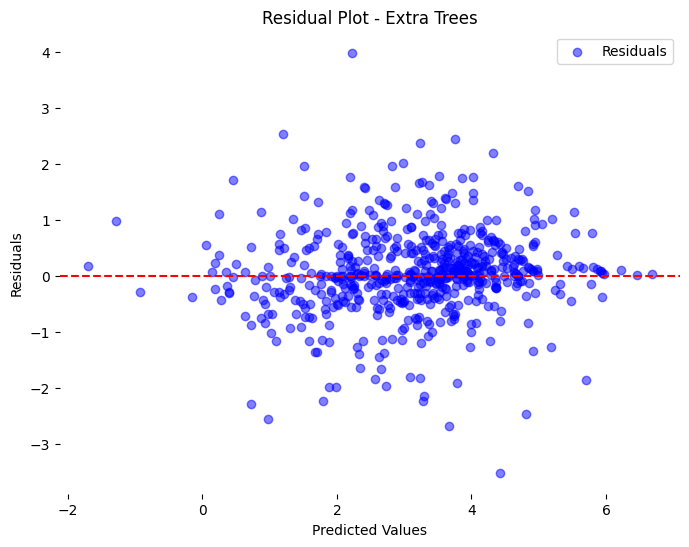

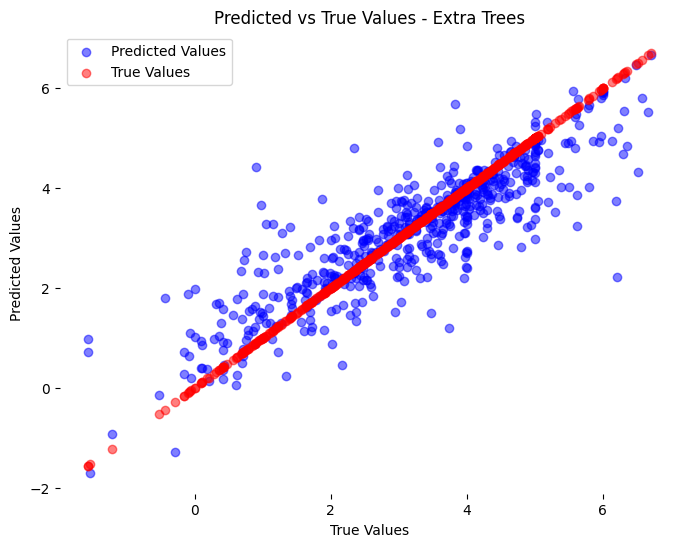

In [ ]:
# Residual Plot for Best Model
def plot_residuals_best_model(y_true, y_pred):
    residuals = y_true - y_pred
    plt.figure(figsize=(8, 6))
    plt.scatter(y_pred, residuals, color='blue', alpha=0.5, label='Residuals')
    plt.title(f"Residual Plot - {best_model_name}")
    plt.xlabel("Predicted Values")
    plt.ylabel("Residuals")
    plt.axhline(y=0, color='r', linestyle='--')
    plt.legend()
    plt.grid(False)  # Remove grid
    plt.box(False)   # Remove box around plot
    plt.savefig(f"residual_plot_{best_model_name}.png")  # Save the plot
    plt.show()

# Plot Predicted vs True Values for Best Model
def plot_predicted_vs_true_best_model(y_true, y_pred):
    plt.figure(figsize=(8, 6))
    plt.scatter(y_true, y_pred, color='blue', alpha=0.5, label='Predicted Values')
    plt.scatter(y_true, y_true, color='red', alpha=0.5, label='True Values')
    plt.title(f"Predicted vs True Values - {best_model_name}")
    plt.xlabel("True Values")
    plt.ylabel("Predicted Values")
    plt.legend()
    plt.grid(False)  # Remove grid
    plt.box(False)   # Remove box around plot
    plt.savefig(f"predicted_vs_true_values_plot_{best_model_name}.png")  # Save the plot
    plt.show()

# Plot residual plot and predicted vs true values for the best model
plot_residuals_best_model(y_test, best_y_test_pred)
plot_predicted_vs_true_best_model(y_test, best_y_test_pred)


In [ ]:
import joblib
joblib.dump(best_model, 'best_model.pkl')
print("Best model saved to 'best_model.pkl'.")

Best model saved to 'best_model.pkl'.


## Cross species evaluation

### Upload and prep for species dataset



In [ ]:
df_humanIndependent=pd.read_excel('/content/drive/MyDrive/Predictive-Generative-transfer learning/RegressionModel_Independent_analysis/regression dataset/SupplementalFiles/species final dataset/df_humanIndependent_tpot_final.xlsx')
df_eel=pd.read_excel('/content/drive/MyDrive/Predictive-Generative-transfer learning/RegressionModel_Independent_analysis/regression dataset/SupplementalFiles/species final dataset/df_eel_tpot_final.xlsx')
df_mouse=pd.read_excel('/content/drive/MyDrive/Predictive-Generative-transfer learning/RegressionModel_Independent_analysis/regression dataset/SupplementalFiles/species final dataset/df_mouse_tpot_final.xlsx')
df_cow=pd.read_excel('/content/drive/MyDrive/Predictive-Generative-transfer learning/RegressionModel_Independent_analysis/regression dataset/SupplementalFiles/species final dataset/df_cow_tpot_final.xlsx')
df_ray=pd.read_excel('/content/drive/MyDrive/Predictive-Generative-transfer learning/RegressionModel_Independent_analysis/regression dataset/SupplementalFiles/species final dataset/df_ray_tpot_final.xlsx')
df_mosquito=pd.read_excel('/content/drive/MyDrive/Predictive-Generative-transfer learning/RegressionModel_Independent_analysis/regression dataset/SupplementalFiles/species final dataset/df_mosquito_tpot_final.xlsx')

### Featurization of all species dataset
The code for descriptor calculation was adopted form blogpost by [@greglandrum](https://https://greglandrum.github.io/rdkit-blog/posts/2022-12-23-descriptor-tutorial.html)



In [ ]:
import pandas as pd
from rdkit import Chem
from rdkit.Chem import Descriptors

# Function to calculate molecular descriptors for a given molecule
def getMolDescriptors(mol, missingVal=None):
    res = {}
    for nm, fn in Descriptors._descList:
        try:
            val = fn(mol)
        except:
            val = missingVal
        res[nm] = val
    return res

# Function to calculate descriptors for a dataset
def calculate_descriptors(df, smiles_column):
    descriptor_list = []
    for smiles in df[smiles_column]:
        mol = Chem.MolFromSmiles(smiles)
        if mol is not None:
            descriptors = getMolDescriptors(mol, missingVal=None)
            descriptor_list.append(descriptors)
        else:
            descriptor_list.append({})
    return pd.DataFrame(descriptor_list)

# Calculate descriptors for each dataset
df_humanIndependent_features = calculate_descriptors(df_humanIndependent, 'cleanedMol')
df_eel_features = calculate_descriptors(df_eel, 'cleanedMol')
df_mouse_features = calculate_descriptors(df_mouse, 'cleanedMol')
df_cow_features = calculate_descriptors(df_cow, 'cleanedMol')
df_ray_features = calculate_descriptors(df_ray, 'cleanedMol')
df_mosquito_features = calculate_descriptors(df_mosquito, 'cleanedMol')

# Concatenate original datasets with their respective features
df_humanIndependent = pd.concat([df_humanIndependent, df_humanIndependent_features], axis=1)
df_eel = pd.concat([df_eel, df_eel_features], axis=1)
df_mouse = pd.concat([df_mouse, df_mouse_features], axis=1)
df_cow = pd.concat([df_cow, df_cow_features], axis=1)
df_ray = pd.concat([df_ray, df_ray_features], axis=1)
df_mosquito = pd.concat([df_mosquito, df_mosquito_features], axis=1)


In [ ]:
tpot_column= feature1.columns.tolist()
optimized_column= feature_dataframe.columns.tolist()

### Tpot cross species evaluation





#### Dataset preparation for tpot model evaluation

In [ ]:
df_humanIndependent_features_tpot=df_humanIndependent_features[tpot_column]
df_eel_features_tpot=df_eel_features[tpot_column]
df_mouse_features_tpot=df_mouse_features[tpot_column]
df_cow_features_tpot=df_cow_features[tpot_column]
df_ray_features_tpot=df_ray_features[tpot_column]
df_mosquito_features_tpot=df_mosquito_features[tpot_column]

In [ ]:
df_eel_tpot_final=pd.merge(df_eel[['cleanedMol', 'IC50']], df_eel_features_tpot, left_index=True, right_index=True)
df_mouse_tpot_final=pd.merge(df_mouse[['cleanedMol', 'IC50']], df_mouse_features_tpot, left_index=True, right_index=True)
df_cow_tpot_final=pd.merge(df_cow[['cleanedMol', 'IC50']], df_cow_features_tpot, left_index=True, right_index=True)
df_ray_tpot_final=pd.merge(df_ray[['cleanedMol', 'IC50']], df_ray_features_tpot, left_index=True, right_index=True)
df_mosquito_tpot_final=pd.merge(df_mosquito[['cleanedMol', 'IC50']], df_mosquito_features_tpot, left_index=True, right_index=True)
df_humanIndependent_tpot_final=pd.merge(df_humanIndependent[['cleanedMol', 'IC50']], df_humanIndependent_features_tpot, left_index=True, right_index=True)

#### Dataset preparation for tpot model evaluation

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(feature1, target, test_size=0.20, random_state=42)


In [ ]:
test_df_tpot = pd.merge(df[['cleanedMol', 'IC50']], X_test, left_index=True, right_index=True, how='inner')

#### Assigning negative pIC50 value to each datainstances

In [ ]:
test_df_tpot.insert(0, 'pIC50', np.log10(test_df_tpot['IC50']))


In [ ]:
test_df_tpot

,pIC50,cleanedMol,IC50,MaxEStateIndex,MinEStateIndex,MaxAbsEStateIndex,MinAbsEStateIndex,qed,MolWt,HeavyAtomMolWt,...,fr_quatN,fr_sulfide,fr_sulfonamd,fr_sulfone,fr_term_acetylene,fr_tetrazole,fr_thiazole,fr_thiophene,fr_unbrch_alkane,fr_urea
6,1.654177,Nc1c2c(nc3ccccc13)CCCC2,45.10,6.199769,0.953981,6.199769,0.953981,0.706488,198.269,184.157,...,0,0,0,0,0,0,0,0,0,0
8,0.748188,O=[N+]([O-])OCCCNCCCCNc1c2c(nc3ccccc13)CCCC2,5.60,10.046839,-0.742861,10.046839,0.154546,0.356480,372.469,344.245,...,0,0,0,0,0,0,0,0,7,0
12,3.260071,COc1ccc(C(=O)c2ccc(CN(C)Cc3ccccc3)cc2)cc1,1820.00,12.569376,0.024855,12.569376,0.024855,0.588089,345.442,322.258,...,0,0,0,0,0,0,0,0,0,0
14,4.000000,C=CC[N+](C)(C)c1ccc(OC(C)=O)cc1,10000.00,10.758086,-0.298526,10.758086,0.298526,0.336849,220.292,202.148,...,1,0,0,0,0,0,0,0,0,0
17,5.636488,CN(CCCCCCCOc1ccc2c(=O)c3ccccc3oc2c1)Cc1ccccc1Cl,433000.00,12.623533,-0.003786,12.623533,0.003786,0.176201,464.005,433.765,...,0,0,0,0,0,0,0,0,5,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4053,3.008600,N#Cc1ccc(CN2CCC(Nc3nc(-c4ccc(Cl)cc4)c(-c4ccc(C...,1020.00,8.987949,0.383797,8.987949,0.383797,0.283264,519.501,495.309,...,0,0,0,0,0,0,1,0,0,0
4064,3.939519,CNc1nc(NCCc2ccccc2)c2ccccc2n1,8700.00,4.517236,0.635103,4.517236,0.635103,0.751376,278.359,260.215,...,0,0,0,0,0,0,0,0,0,0
4070,4.268344,CC(C)=CCC[C@]1(C)[C@@H](CC=C(C)C)C[C@@]2(CC=C(...,18550.00,15.262323,-1.970036,15.262323,0.001837,0.227299,568.795,516.379,...,0,0,0,0,0,0,0,0,0,0
4071,1.899985,O=C1C(=O)N(C(=O)c2ccccc2)c2ccc(CN3CCCCC3)cc21,79.43,12.712094,-0.774097,12.712094,0.327584,0.631875,348.402,328.242,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
# For df_humanIndependent_tpot_final
df_humanIndependent_tpot_final.insert(0, 'pIC50', np.log10(df_humanIndependent_tpot_final['IC50']))

# For df_eel_tpot_final
df_eel_tpot_final.insert(0, 'pIC50', np.log10(df_eel_tpot_final['IC50']))

# For df_mouse_tpot_final
df_mouse_tpot_final.insert(0, 'pIC50', -np.log10(df_mouse_tpot_final['IC50']))

# For df_cow_tpot_final
df_cow_tpot_final.insert(0, 'pIC50', -np.log10(df_cow_tpot_final['IC50']))

# For df_ray_tpot_final
df_ray_tpot_final.insert(0, 'pIC50', -np.log10(df_ray_tpot_final['IC50']))

# For df_mosquito_tpot_final
df_mosquito_tpot_final.insert(0, 'pIC50', -np.log10(df_mosquito_tpot_final['IC50']))


#### Evaulation of cross species dataset on tpot model

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

# Assuming you have a dictionary of datasets
datasets = {
    'Human Test': test_df_tpot,
    'Human Independent': df_humanIndependent_tpot_final,
    'Eel': df_eel_tpot_final,
    'Mouse': df_mouse_tpot_final,
    'Cow': df_cow_tpot_final,
    'Ray': df_ray_tpot_final,
    'Mosquito': df_mosquito_tpot_final
}

# Initialize a dictionary to store evaluation metrics for each dataset
evaluation_metrics = {}

# Set up the plot
plt.figure(figsize=(10, 6))

for species, data in datasets.items():
    X = data.loc[:, 'MaxEStateIndex':]
    y = data['pIC50']

    # Predict on the test set using the pre-fitted model
    y_pred = best_pipeline.predict(X)

    # Calculate evaluation metrics
    mse = mean_squared_error(y, y_pred)
    rmse = np.sqrt(mse)
    mae = mean_absolute_error(y, y_pred)
    r2 = r2_score(y, y_pred)

    # Store metrics in the evaluation_metrics dictionary
    evaluation_metrics[species] = {
        'MSE': mse,
        'RMSE': rmse,
        'MAE': mae,
        'R2': r2
    }

    # Plot y_pred vs. y_true
    plt.figure(figsize=(8, 6))
    plt.scatter(y, y_pred, color='blue', alpha=0.7, label='RMSE: {:.2f}, R Squared: {:.2f}'.format(rmse, r2))
    plt.plot([y.min(), y.max()], [y.min(), y.max()], 'k--', lw=2)
    plt.xlabel('True Values', fontsize=14)
    plt.ylabel('Predicted Values', fontsize=14)
    plt.title(f'True vs. Predicted Values for {species}', fontsize=16)
    plt.xticks(fontsize=12)
    plt.yticks(fontsize=12)
    plt.legend(loc='upper left', fontsize=12)
    plt.grid(False)
    plt.box(False)
    plt.tight_layout()
    plt.savefig(f'y_pred_vs_y_true_{species}.png', dpi=300)
    plt.close()

    # Plot residual plot
    residuals = y - y_pred
    plt.figure(figsize=(8, 6))
    sns.residplot(x=y, y=residuals, lowess=True, color="blue", scatter_kws={'alpha': 0.7, 's': 60})
    plt.xlabel('True Values', fontsize=14)
    plt.ylabel('Residuals', fontsize=14)
    plt.xticks(fontsize=12)
    plt.yticks(fontsize=12)
    plt.title(f'Residual Plot for {species}')
    plt.axhline(y=0, color='k', linestyle='--', linewidth=2)
    plt.grid(False)
    plt.box(False)
    plt.tight_layout()
    plt.savefig(f'residual_plot_{species}.png', dpi=300)
    plt.close()

# Create a list to store all evaluation metrics dataframes
all_metrics_dfs = []

for species, metrics in evaluation_metrics.items():
    print(f"Evaluation for {species} dataset:")
    for metric_name, value in metrics.items():
        print(f"{metric_name}: {value:.4f}")

    # Create a dataframe for each species' metrics
    metrics_df = pd.DataFrame(metrics, index=[species])
    all_metrics_dfs.append(metrics_df)

# Concatenate all metrics dataframes into a single dataframe
all_metrics_combined = pd.concat(all_metrics_dfs)

# Save the combined metrics dataframe to an Excel file
all_metrics_combined.to_excel('evaluation_metrics_combined_tpot.xlsx')

# Display the combined metrics dataframe
print("\nCombined Evaluation Metrics:")
print(all_metrics_combined)


Evaluation for Human Test dataset:
MSE: 0.7019
RMSE: 0.8378
MAE: 0.6005
R2: 0.7148
Evaluation for Human Independent dataset:
MSE: 0.5550
RMSE: 0.7450
MAE: 0.5800
R2: 0.5366
Evaluation for Eel dataset:
MSE: 1.1971
RMSE: 1.0941
MAE: 0.8472
R2: 0.3052
Evaluation for Mouse dataset:
MSE: 39.0058
RMSE: 6.2455
MAE: 5.9383
R2: -18.7461
Evaluation for Cow dataset:
MSE: 32.8141
RMSE: 5.7284
MAE: 5.0427
R2: -10.1298
Evaluation for Ray dataset:
MSE: 39.4455
RMSE: 6.2806
MAE: 5.5556
R2: -10.9789
Evaluation for Mosquito dataset:
MSE: 54.9996
RMSE: 7.4162
MAE: 7.0728
R2: -23.4362

Combined Evaluation Metrics:
                         MSE      RMSE       MAE         R2
Human Test          0.701871  0.837778  0.600480   0.714819
Human Independent   0.554977  0.744968  0.579956   0.536552
Eel                 1.197097  1.094119  0.847227   0.305158
Mouse              39.005753  6.245459  5.938320 -18.746069
Cow                32.814071  5.728357  5.042728 -10.129756
Ray                39.445518  6.280567

<Figure size 1000x600 with 0 Axes>

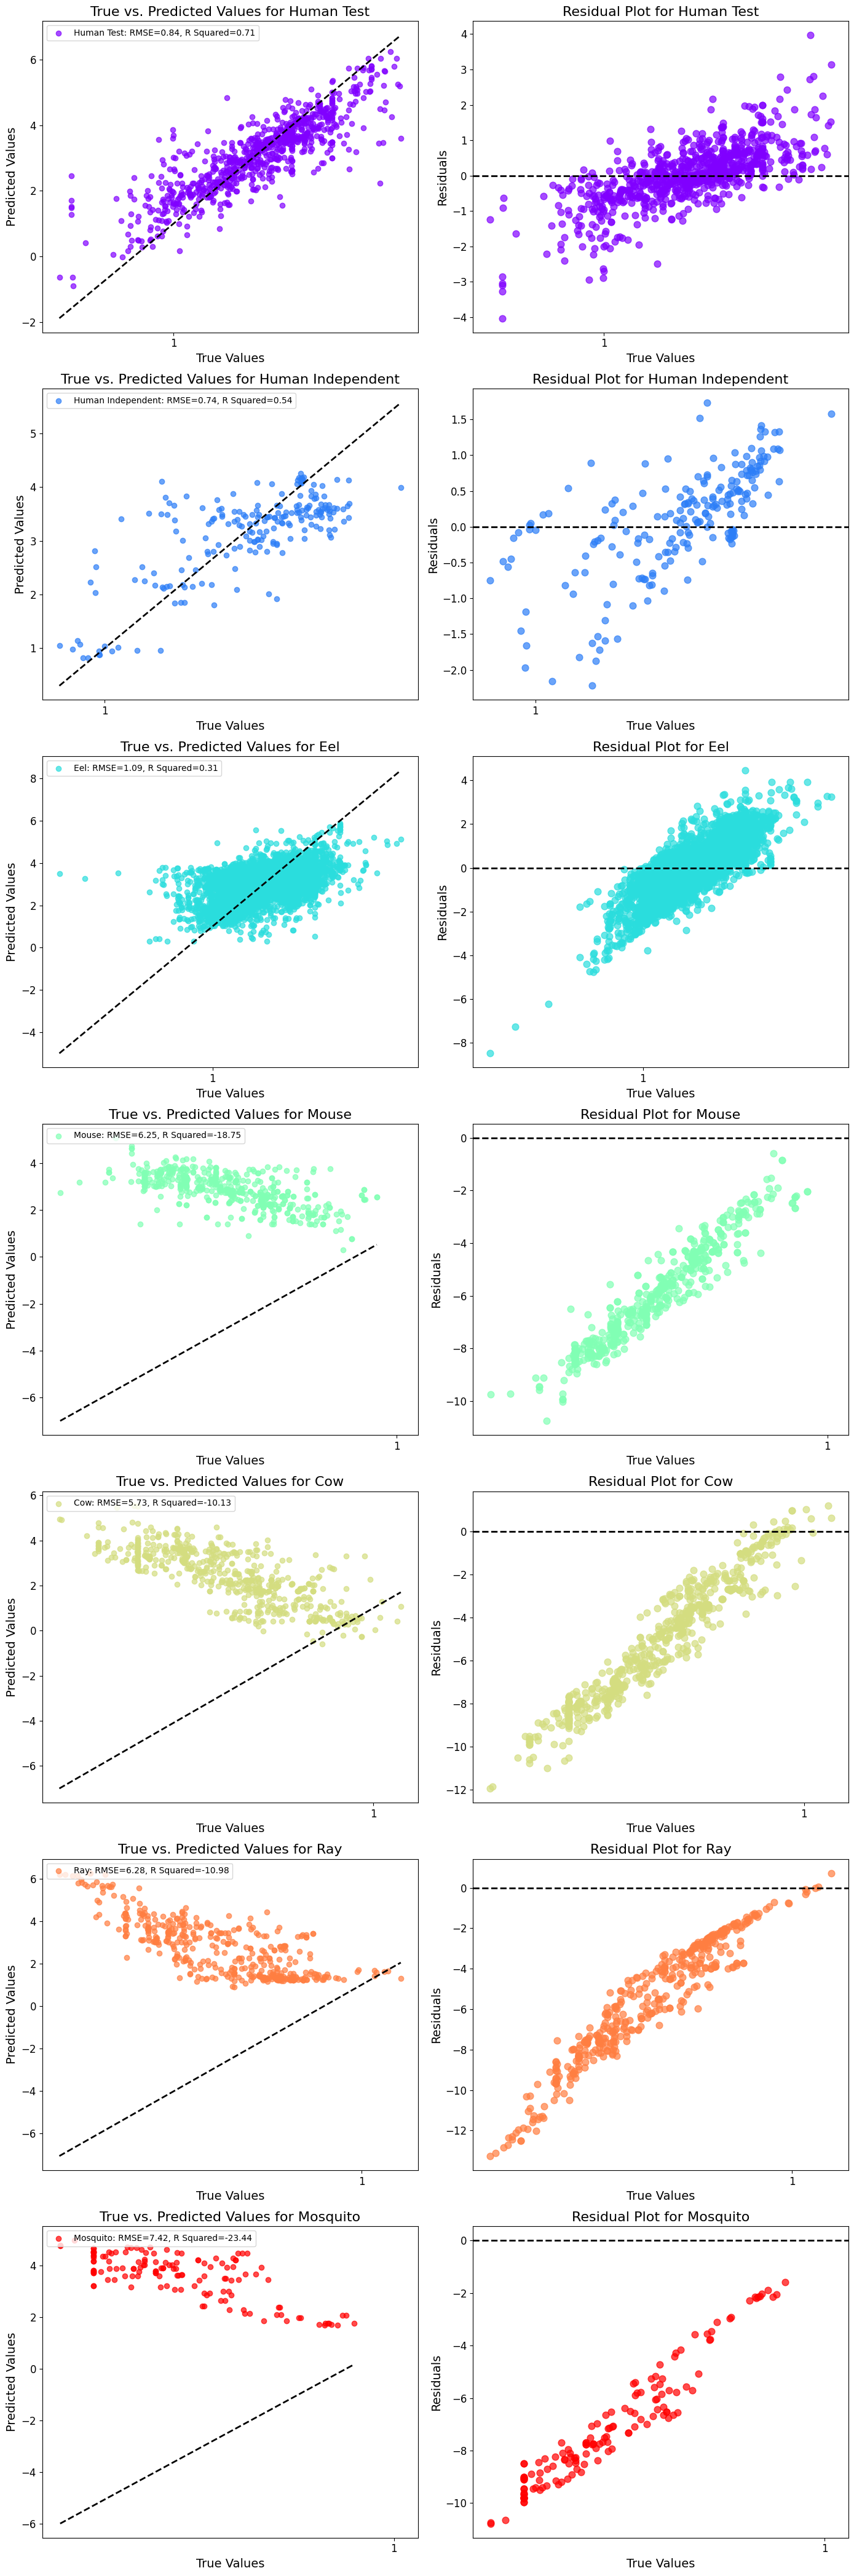

Evaluation for Human Test dataset:
MSE: 0.7019
RMSE: 0.8378
MAE: 0.6005
R2: 0.7148
Evaluation for Human Independent dataset:
MSE: 0.5550
RMSE: 0.7450
MAE: 0.5800
R2: 0.5366
Evaluation for Eel dataset:
MSE: 1.1971
RMSE: 1.0941
MAE: 0.8472
R2: 0.3052
Evaluation for Mouse dataset:
MSE: 39.0058
RMSE: 6.2455
MAE: 5.9383
R2: -18.7461
Evaluation for Cow dataset:
MSE: 32.8141
RMSE: 5.7284
MAE: 5.0427
R2: -10.1298
Evaluation for Ray dataset:
MSE: 39.4455
RMSE: 6.2806
MAE: 5.5556
R2: -10.9789
Evaluation for Mosquito dataset:
MSE: 54.9996
RMSE: 7.4162
MAE: 7.0728
R2: -23.4362

Combined Evaluation Metrics:
                         MSE      RMSE       MAE         R2
Human Test          0.701871  0.837778  0.600480   0.714819
Human Independent   0.554977  0.744968  0.579956   0.536552
Eel                 1.197097  1.094119  0.847227   0.305158
Mouse              39.005753  6.245459  5.938320 -18.746069
Cow                32.814071  5.728357  5.042728 -10.129756
Ray                39.445518  6.280567

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
# Assuming you have a dictionary of datasets
datasets = {
    'Human Test': test_df_tpot,
    'Human Independent': df_humanIndependent_tpot_final,
    'Eel': df_eel_tpot_final,
    'Mouse': df_mouse_tpot_final,
    'Cow': df_cow_tpot_final,
    'Ray': df_ray_tpot_final,
    'Mosquito': df_mosquito_tpot_final
}

# Initialize a dictionary to store evaluation metrics for each dataset
evaluation_metrics = {}

# Set up the plot
fig, axs = plt.subplots(nrows=len(datasets), ncols=2, figsize=(14, 6 * len(datasets)))

colors = iter(plt.cm.rainbow(np.linspace(0, 1, len(datasets))))

for i, (species, data) in enumerate(datasets.items()):
    X = data.loc[:, 'MaxEStateIndex':]
    y = data['pIC50']

    # Predict on the test set using the pre-fitted model
    y_pred = best_pipeline.predict(X)

    # Calculate evaluation metrics
    mse = mean_squared_error(y, y_pred)
    rmse = np.sqrt(mse)
    mae = mean_absolute_error(y, y_pred)
    r2 = r2_score(y, y_pred)

    # Store metrics in the evaluation_metrics dictionary
    evaluation_metrics[species] = {
        'MSE': mse,
        'RMSE': rmse,
        'MAE': mae,
        'R2': r2
    }

    # Plot y_pred vs. y_true
    color = next(colors)
    axs[i, 0].scatter(y, y_pred, color=color, alpha=0.7, label=f'{species}: RMSE={rmse:.2f}, R Squared={r2:.2f}')
    axs[i, 0].plot([y.min(), y.max()], [y.min(), y.max()], 'k--', lw=2)  # No label for fit line
    axs[i, 0].set_xlabel('True Values', fontsize=14)
    axs[i, 0].set_ylabel('Predicted Values', fontsize=14)
    axs[i, 0].set_title(f'True vs. Predicted Values for {species}', fontsize=16)  # Removed R-squared and RMSE from the title
    axs[i, 0].tick_params(axis='both', which='major', labelsize=12)
    axs[i, 0].legend(loc='upper left', fontsize=10)  # Moved the label to the far-left corner
    axs[i, 0].grid(False)  # Remove grid
    axs[i, 0].boxplot([], showmeans=False)   # Remove box

    # Plot residual plot
    residuals = y - y_pred
    axs[i, 1].scatter(y, residuals, color=color, alpha=0.7, s=60)
    axs[i, 1].axhline(y=0, color='k', linestyle='--', linewidth=2)
    axs[i, 1].set_xlabel('True Values', fontsize=14)
    axs[i, 1].set_ylabel('Residuals', fontsize=14)
    axs[i, 1].set_title(f'Residual Plot for {species}', fontsize=16)  # Removed R-squared and RMSE from the title
    axs[i, 1].tick_params(axis='both', which='major', labelsize=12)
    axs[i, 1].grid(False)  # Remove grid
    axs[i, 1].boxplot([], showmeans=False)   # Remove box

plt.tight_layout()
plt.savefig('all_species_plots.png', dpi=300)
plt.show()

# Create a list to store all evaluation metrics dataframes
all_metrics_dfs = []

for species, metrics in evaluation_metrics.items():
    print(f"Evaluation for {species} dataset:")
    for metric_name, value in metrics.items():
        print(f"{metric_name}: {value:.4f}")

    # Create a dataframe for each species' metrics
    metrics_df = pd.DataFrame(metrics, index=[species])
    all_metrics_dfs.append(metrics_df)

# Concatenate all metrics dataframes into a single dataframe
all_metrics_combined = pd.concat(all_metrics_dfs)

# Save the combined metrics dataframe to an Excel file
all_metrics_combined.to_excel('evaluation_metrics_combined_tpot.xlsx')

# Display the combined metrics dataframe
print("\nCombined Evaluation Metrics:")
print(all_metrics_combined)


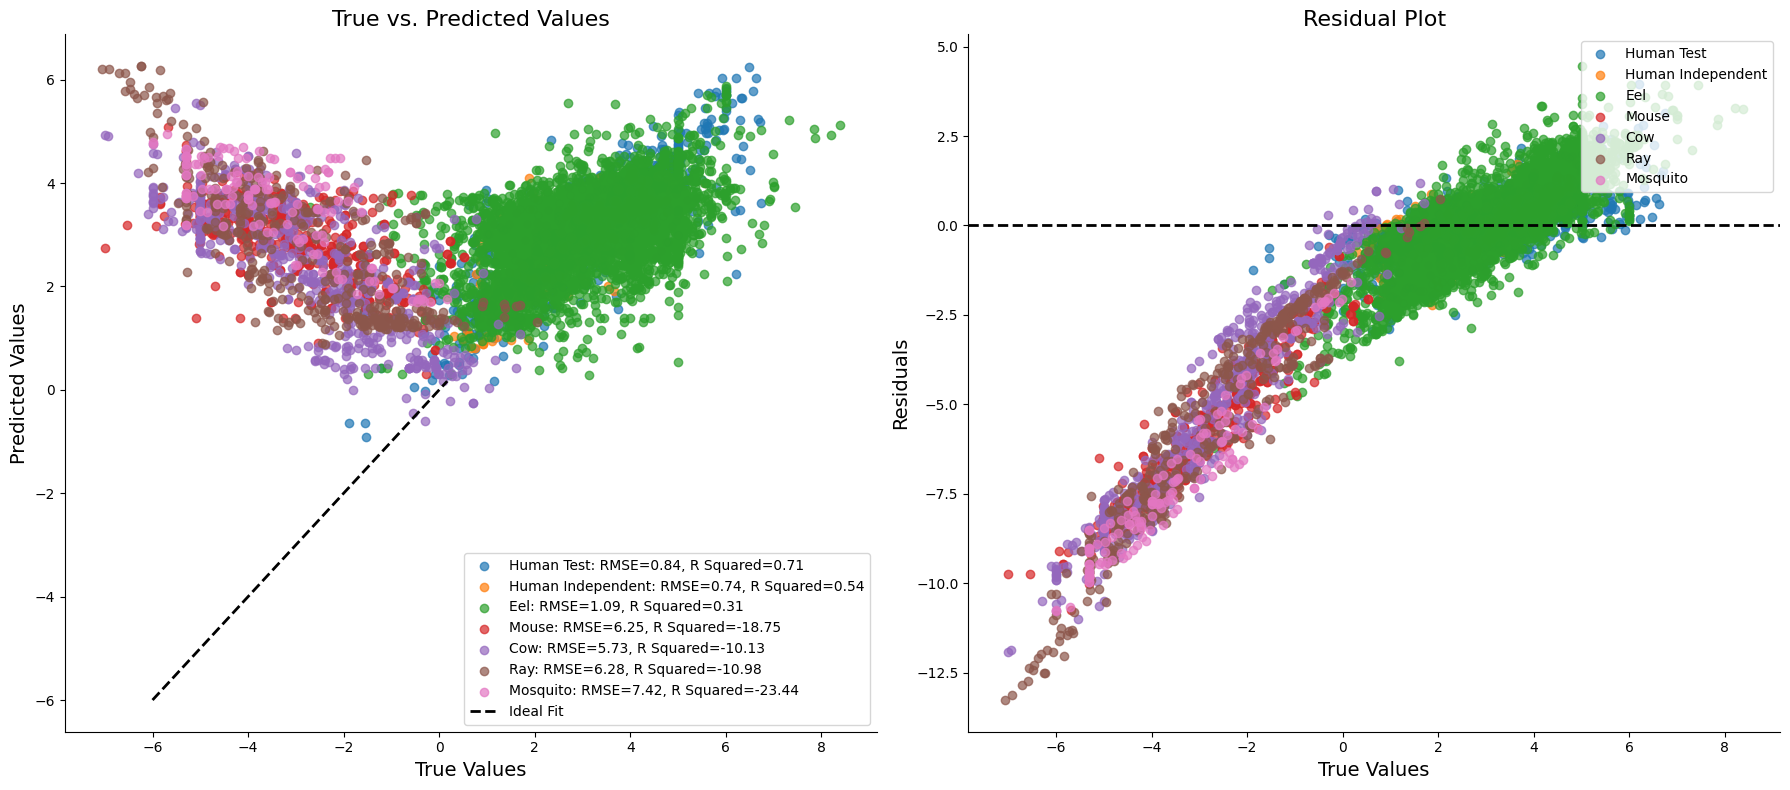

Evaluation for Human Test dataset:
MSE: 0.7019
RMSE: 0.8378
MAE: 0.6005
R2: 0.7148
Evaluation for Human Independent dataset:
MSE: 0.5550
RMSE: 0.7450
MAE: 0.5800
R2: 0.5366
Evaluation for Eel dataset:
MSE: 1.1971
RMSE: 1.0941
MAE: 0.8472
R2: 0.3052
Evaluation for Mouse dataset:
MSE: 39.0058
RMSE: 6.2455
MAE: 5.9383
R2: -18.7461
Evaluation for Cow dataset:
MSE: 32.8141
RMSE: 5.7284
MAE: 5.0427
R2: -10.1298
Evaluation for Ray dataset:
MSE: 39.4455
RMSE: 6.2806
MAE: 5.5556
R2: -10.9789
Evaluation for Mosquito dataset:
MSE: 54.9996
RMSE: 7.4162
MAE: 7.0728
R2: -23.4362

Combined Evaluation Metrics:
                         MSE      RMSE       MAE         R2
Human Test          0.701871  0.837778  0.600480   0.714819
Human Independent   0.554977  0.744968  0.579956   0.536552
Eel                 1.197097  1.094119  0.847227   0.305158
Mouse              39.005753  6.245459  5.938320 -18.746069
Cow                32.814071  5.728357  5.042728 -10.129756
Ray                39.445518  6.280567

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

datasets = {
    'Human Test': test_df_tpot,
    'Human Independent': df_humanIndependent_tpot_final,
    'Eel': df_eel_tpot_final,
    'Mouse': df_mouse_tpot_final,
    'Cow': df_cow_tpot_final,
    'Ray': df_ray_tpot_final,
    'Mosquito': df_mosquito_tpot_final
}

# Initialize a dictionary to store evaluation metrics for each dataset
evaluation_metrics = {}

# Set up the plot
fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(18, 8))

# Plot y_pred vs. y_true
ax = axs[0]
for species, data in datasets.items():
    X = data.loc[:, 'MaxEStateIndex':]
    y = data['pIC50']
    # Predict on the test set using the pre-fitted model
    y_pred = best_pipeline.predict(X)
    # Calculate evaluation metrics
    mse = mean_squared_error(y, y_pred)
    rmse = np.sqrt(mse)
    mae = mean_absolute_error(y, y_pred)
    r2 = r2_score(y, y_pred)

    # Store metrics in the evaluation_metrics dictionary
    evaluation_metrics[species] = {
        'MSE': mse,
        'RMSE': rmse,
        'MAE': mae,
        'R2': r2
    }

    # Plot y_pred vs. y_true
    ax.scatter(y, y_pred, label=f'{species}: RMSE={rmse:.2f}, R Squared={r2:.2f}', alpha=0.7)

ax.plot([y.min(), y.max()], [y.min(), y.max()], 'k--', lw=2, label='Ideal Fit')  # No label for fit line
ax.set_xlabel('True Values', fontsize=14)
ax.set_ylabel('Predicted Values', fontsize=14)
ax.set_title('True vs. Predicted Values', fontsize=16)
ax.legend(loc='lower right', fontsize=10)
ax.grid(False)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

# Plot residual plot
ax = axs[1]
for species, data in datasets.items():
    X = data.loc[:, 'MaxEStateIndex':]
    y = data['pIC50']

    # Predict on the test set using the pre-fitted model
    y_pred = best_pipeline.predict(X)

    # Plot residual plot
    residuals = y - y_pred
    ax.scatter(y, residuals, label=f'{species}', alpha=0.7)

ax.axhline(y=0, color='k', linestyle='--', linewidth=2)
ax.set_xlabel('True Values', fontsize=14)
ax.set_ylabel('Residuals', fontsize=14)
ax.set_title('Residual Plot', fontsize=16)
ax.legend(loc='upper right', fontsize=10)
ax.grid(False)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

plt.tight_layout()
plt.savefig('all_species_plots.png', dpi=300)
plt.show()

# Create a list to store all evaluation metrics dataframes
all_metrics_dfs = []

for species, metrics in evaluation_metrics.items():
    print(f"Evaluation for {species} dataset:")
    for metric_name, value in metrics.items():
        print(f"{metric_name}: {value:.4f}")

    # Create a dataframe for each species' metrics
    metrics_df = pd.DataFrame(metrics, index=[species])
    all_metrics_dfs.append(metrics_df)

# Concatenate all metrics dataframes into a single dataframe
all_metrics_combined = pd.concat(all_metrics_dfs)

# Save the combined metrics dataframe to an Excel file
all_metrics_combined.to_excel('evaluation_metrics_combined_tpot.xlsx')

# Display the combined metrics dataframe
print("\nCombined Evaluation Metrics:")
print(all_metrics_combined)


### Cross species evaulation on aggregrate modeling

#### Dataset preparation for evaluation on aggregrate model

In [ ]:
df_humanIndependent_features_optimized=df_humanIndependent_features[optimized_column]
df_eel_features_optimized=df_eel_features[optimized_column]
df_mouse_features_optimized=df_mouse_features[optimized_column]
df_cow_features_optimized=df_cow_features[optimized_column]
df_ray_features_optimized=df_ray_features[optimized_column]
df_mosquito_features_optimized=df_mosquito_features[optimized_column]

In [ ]:
df_humanIndependent_optimized_final=pd.merge(df_humanIndependent[['cleanedMol', 'IC50']], df_humanIndependent_features_optimized, left_index=True, right_index=True)
df_eel_optimized_final=pd.merge(df_eel[['cleanedMol', 'IC50']], df_eel_features_optimized, left_index=True, right_index=True)
df_mouse_optimized_final=pd.merge(df_mouse[['cleanedMol', 'IC50']], df_mouse_features_optimized, left_index=True, right_index=True)
df_cow_optimized_final=pd.merge(df_cow[['cleanedMol', 'IC50']], df_cow_features_optimized, left_index=True, right_index=True)
df_ray_optimized_final=pd.merge(df_ray[['cleanedMol', 'IC50']], df_ray_features_optimized, left_index=True, right_index=True)
df_mosquito_optimized_final=pd.merge(df_mosquito[['cleanedMol', 'IC50']], df_mosquito_features_optimized, left_index=True, right_index=True)

#### Dataset preparation for aggregrate model evaluation

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(feature_dataframe, target, test_size=0.20, random_state=42)


In [ ]:
test_df_optimized = pd.merge(df[['cleanedMol', 'IC50']], X_test, left_index=True, right_index=True, how='inner')

#### Assigning negative pIC50 value to each datainstances

In [ ]:
test_df_optimized.insert(0, 'pIC50', np.log10(test_df_optimized['IC50']))


In [ ]:
test_df_optimized

,pIC50,cleanedMol,IC50,MaxEStateIndex,MinEStateIndex,MaxAbsEStateIndex,MinAbsEStateIndex,qed,FpDensityMorgan1,FpDensityMorgan3,...,fr_quatN,fr_sulfide,fr_sulfonamd,fr_sulfone,fr_term_acetylene,fr_tetrazole,fr_thiazole,fr_thiophene,fr_unbrch_alkane,fr_urea
6,1.654177,Nc1c2c(nc3ccccc13)CCCC2,45.10,6.199769,0.953981,6.199769,0.953981,0.706488,1.066667,2.800000,...,0,0,0,0,0,0,0,0,0,0
8,0.748188,O=[N+]([O-])OCCCNCCCCNc1c2c(nc3ccccc13)CCCC2,5.60,10.046839,-0.742861,10.046839,0.154546,0.356480,1.074074,2.740741,...,0,0,0,0,0,0,0,0,7,0
12,3.260071,COc1ccc(C(=O)c2ccc(CN(C)Cc3ccccc3)cc2)cc1,1820.00,12.569376,0.024855,12.569376,0.024855,0.588089,0.769231,1.807692,...,0,0,0,0,0,0,0,0,0,0
14,4.000000,C=CC[N+](C)(C)c1ccc(OC(C)=O)cc1,10000.00,10.758086,-0.298526,10.758086,0.298526,0.336849,1.375000,2.375000,...,1,0,0,0,0,0,0,0,0,0
17,5.636488,CN(CCCCCCCOc1ccc2c(=O)c3ccccc3oc2c1)Cc1ccccc1Cl,433000.00,12.623533,-0.003786,12.623533,0.003786,0.176201,0.848485,2.454545,...,0,0,0,0,0,0,0,0,5,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4053,3.008600,N#Cc1ccc(CN2CCC(Nc3nc(-c4ccc(Cl)cc4)c(-c4ccc(C...,1020.00,8.987949,0.383797,8.987949,0.383797,0.283264,0.885714,2.085714,...,0,0,0,0,0,0,1,0,0,0
4064,3.939519,CNc1nc(NCCc2ccccc2)c2ccccc2n1,8700.00,4.517236,0.635103,4.517236,0.635103,0.751376,0.904762,2.476190,...,0,0,0,0,0,0,0,0,0,0
4070,4.268344,CC(C)=CCC[C@]1(C)[C@@H](CC=C(C)C)C[C@@]2(CC=C(...,18550.00,15.262323,-1.970036,15.262323,0.001837,0.227299,1.024390,2.073171,...,0,0,0,0,0,0,0,0,0,0
4071,1.899985,O=C1C(=O)N(C(=O)c2ccccc2)c2ccc(CN3CCCCC3)cc21,79.43,12.712094,-0.774097,12.712094,0.327584,0.631875,0.923077,2.384615,...,0,0,0,0,0,0,0,0,0,0


In [ ]:

# For df_humanIndependent_tpot_final
df_humanIndependent_optimized_final.insert(0, 'pIC50', np.log10(df_humanIndependent_tpot_final['IC50']))

# For df_eel_tpot_final
df_eel_optimized_final.insert(0, 'pIC50', np.log10(df_eel_tpot_final['IC50']))

# For df_mouse_tpot_final
df_mouse_optimized_final.insert(0, 'pIC50', -np.log10(df_mouse_tpot_final['IC50']))

# For df_cow_tpot_final
df_cow_optimized_final.insert(0, 'pIC50', -np.log10(df_cow_tpot_final['IC50']))

# For df_ray_tpot_final
df_ray_optimized_final.insert(0, 'pIC50', -np.log10(df_ray_tpot_final['IC50']))

# For df_mosquito_tpot_final
df_mosquito_optimized_final.insert(0, 'pIC50', -np.log10(df_mosquito_tpot_final['IC50']))


#### Evaulation of cross species dataset on aggregrate model

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

datasets = {
    'Human Test': test_df_optimized,
    'Human Independent': df_humanIndependent_optimized_final,
    'Eel': df_eel_optimized_final,
    'Mouse': df_mouse_optimized_final,
    'Cow': df_cow_optimized_final,
    'Ray': df_ray_optimized_final,
    'Mosquito': df_mosquito_optimized_final
}

# Initialize a dictionary to store evaluation metrics for each dataset
evaluation_metrics = {}

# Set up the plot
plt.figure(figsize=(10, 6))

for species, data in datasets.items():
    X = data.loc[:, 'MaxEStateIndex':]
    feature_names = X.columns.tolist()
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X)
    y = data['pIC50']

    # Predict on the test set using the pre-fitted model
    y_pred = best_model.predict(X_scaled)

    # Calculate evaluation metrics
    mse = mean_squared_error(y, y_pred)
    rmse = np.sqrt(mse)
    mae = mean_absolute_error(y, y_pred)
    r2 = r2_score(y, y_pred)

    # Store metrics in the evaluation_metrics dictionary
    evaluation_metrics[species] = {
        'MSE': mse,
        'RMSE': rmse,
        'MAE': mae,
        'R2': r2
    }

    # Plot y_pred vs. y_true
    plt.figure(figsize=(8, 6))
    plt.scatter(y, y_pred, color='blue', alpha=0.7, label='RMSE: {:.2f}, R Squared: {:.2f}'.format(rmse, r2))
    plt.plot([y.min(), y.max()], [y.min(), y.max()], 'k--', lw=2)
    plt.xlabel('True Values', fontsize=14)
    plt.ylabel('Predicted Values', fontsize=14)
    plt.title(f'True vs. Predicted Values for {species}', fontsize=16)
    plt.xticks(fontsize=12)
    plt.yticks(fontsize=12)
    plt.legend(loc='upper left', fontsize=12)
    plt.grid(False)  # Remove grid
    plt.box(False)   # Remove box
    plt.tight_layout()
    plt.savefig(f'y_pred_vs_y_true_{species}.png', dpi=300)
    plt.close()

    # Plot residual plot
    residuals = y - y_pred
    plt.figure(figsize=(8, 6))
    sns.residplot(x=y, y=residuals, lowess=True, color="blue", scatter_kws={'alpha': 0.7, 's': 60})
    plt.xlabel('True Values', fontsize=14)
    plt.ylabel('Residuals', fontsize=14)
    plt.xticks(fontsize=12)
    plt.yticks(fontsize=12)
    plt.title(f'Residual Plot for {species}')
    plt.axhline(y=0, color='k', linestyle='--', linewidth=2)
    plt.grid(False)
    plt.box(False)
    plt.tight_layout()
    plt.savefig(f'residual_plot_{species}.png', dpi=300)
    plt.close()

# Create a list to store all evaluation metrics dataframes
all_metrics_dfs = []

for species, metrics in evaluation_metrics.items():
    print(f"Evaluation for {species} dataset:")
    for metric_name, value in metrics.items():
        print(f"{metric_name}: {value:.4f}")

    # Create a dataframe for each species' metrics
    metrics_df = pd.DataFrame(metrics, index=[species])
    all_metrics_dfs.append(metrics_df)

# Concatenate all metrics dataframes into a single dataframe
all_metrics_combined = pd.concat(all_metrics_dfs)

# Save the combined metrics dataframe to an Excel file
all_metrics_combined.to_excel('evaluation_metrics_combined_optimized.xlsx')

# Display the combined metrics dataframe
print("\nCombined Evaluation Metrics:")
print(all_metrics_combined)


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but ExtraTreesRegressor was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but ExtraTreesRegressor was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but ExtraTreesRegressor was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but ExtraTreesRegressor was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but ExtraTreesRegressor was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have 

Evaluation for Human Test dataset:
MSE: 0.4496
RMSE: 0.6705
MAE: 0.4458
R2: 0.8173
Evaluation for Human Independent dataset:
MSE: 0.6472
RMSE: 0.8045
MAE: 0.6089
R2: 0.4595
Evaluation for Eel dataset:
MSE: 1.1974
RMSE: 1.0943
MAE: 0.8537
R2: 0.3050
Evaluation for Mouse dataset:
MSE: 42.2357
RMSE: 6.4989
MAE: 6.2848
R2: -20.3812
Evaluation for Cow dataset:
MSE: 36.3015
RMSE: 6.0251
MAE: 5.5624
R2: -11.3126
Evaluation for Ray dataset:
MSE: 42.2500
RMSE: 6.5000
MAE: 5.9469
R2: -11.8306
Evaluation for Mosquito dataset:
MSE: 48.6101
RMSE: 6.9721
MAE: 6.7948
R2: -20.5974

Combined Evaluation Metrics:
                         MSE      RMSE       MAE         R2
Human Test          0.449590  0.670514  0.445830   0.817325
Human Independent   0.647210  0.804494  0.608852   0.459530
Eel                 1.197384  1.094251  0.853706   0.304991
Mouse              42.235656  6.498897  6.284817 -20.381159
Cow                36.301465  6.025070  5.562398 -11.312598
Ray                42.249963  6.499997

<Figure size 1000x600 with 0 Axes>

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but ExtraTreesRegressor was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but ExtraTreesRegressor was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but ExtraTreesRegressor was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but ExtraTreesRegressor was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but ExtraTreesRegressor was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have 

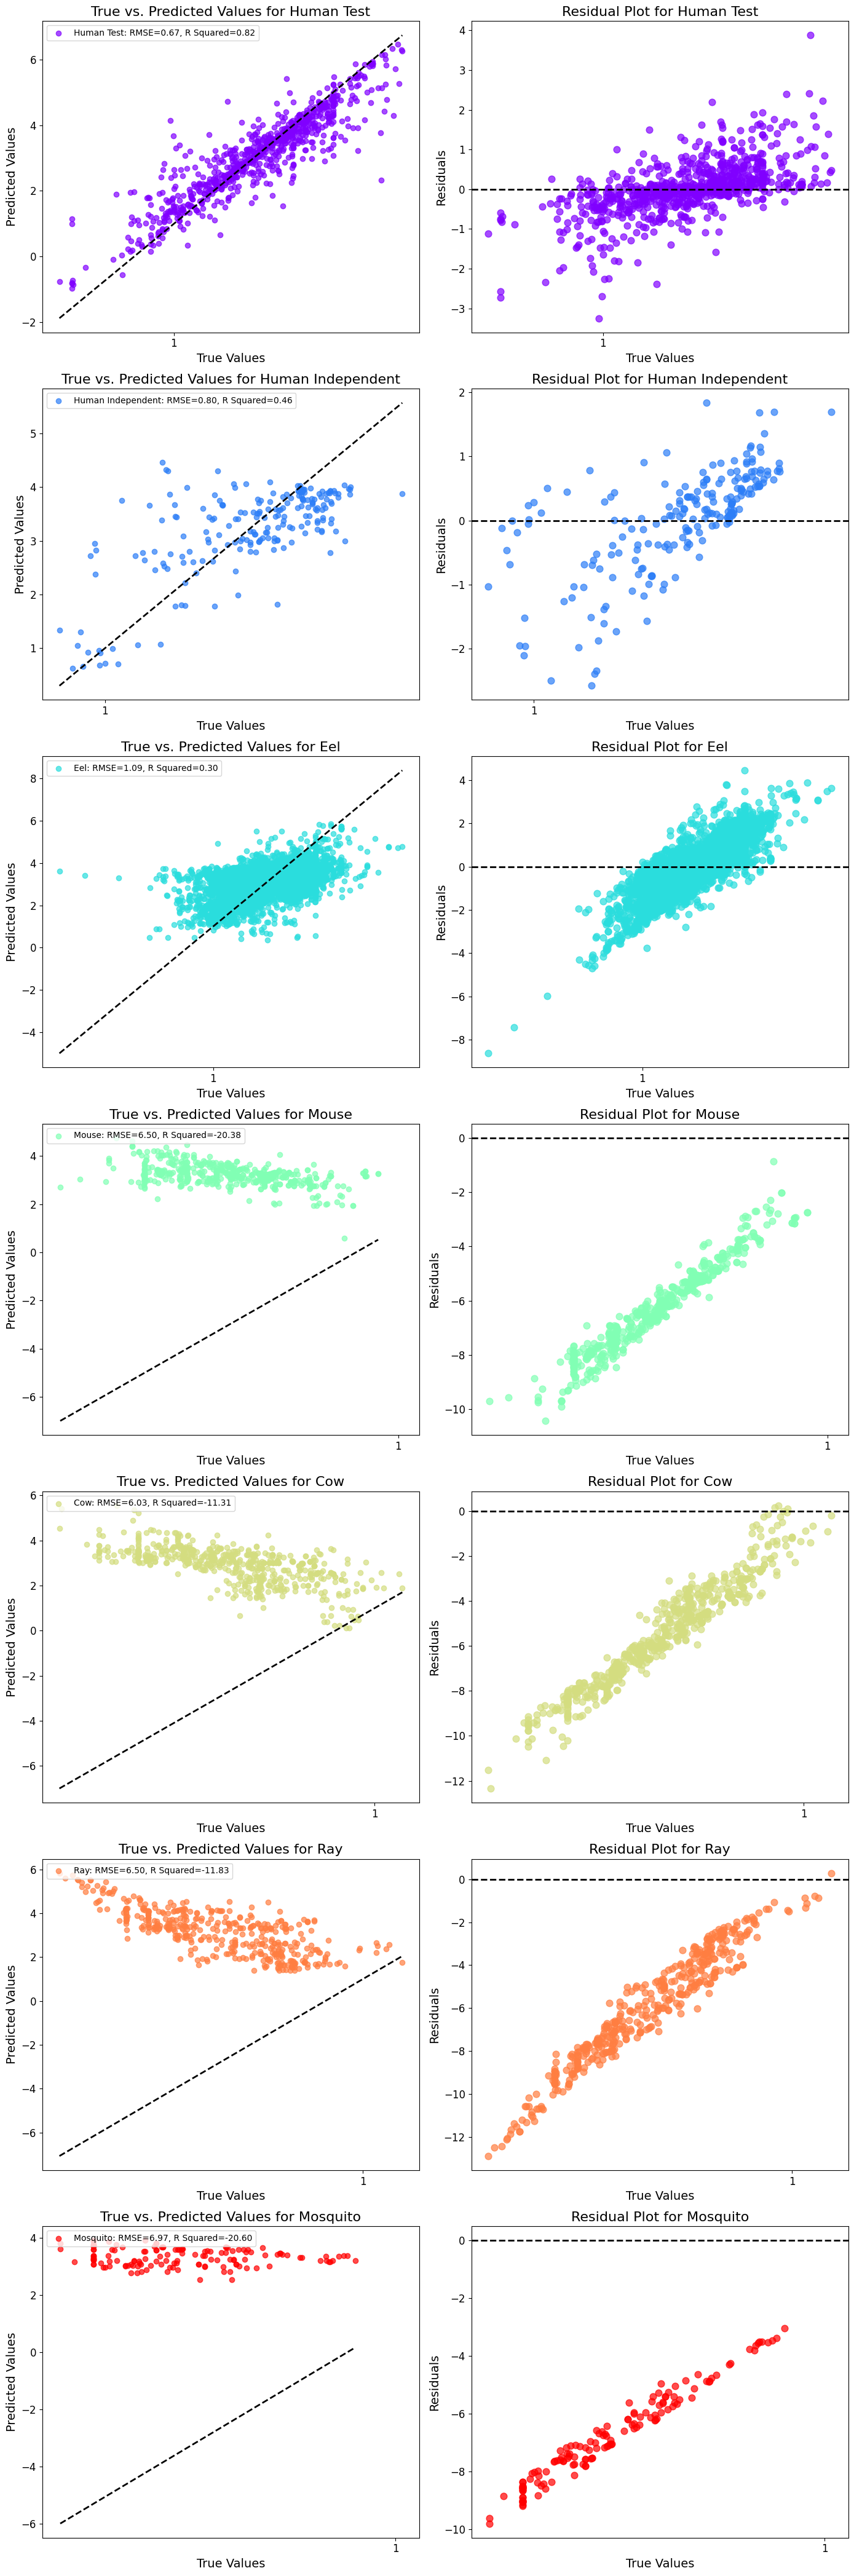

Evaluation for Human Test dataset:
MSE: 0.4496
RMSE: 0.6705
MAE: 0.4458
R2: 0.8173
Evaluation for Human Independent dataset:
MSE: 0.6472
RMSE: 0.8045
MAE: 0.6089
R2: 0.4595
Evaluation for Eel dataset:
MSE: 1.1974
RMSE: 1.0943
MAE: 0.8537
R2: 0.3050
Evaluation for Mouse dataset:
MSE: 42.2357
RMSE: 6.4989
MAE: 6.2848
R2: -20.3812
Evaluation for Cow dataset:
MSE: 36.3015
RMSE: 6.0251
MAE: 5.5624
R2: -11.3126
Evaluation for Ray dataset:
MSE: 42.2500
RMSE: 6.5000
MAE: 5.9469
R2: -11.8306
Evaluation for Mosquito dataset:
MSE: 48.6101
RMSE: 6.9721
MAE: 6.7948
R2: -20.5974

Combined Evaluation Metrics:
                         MSE      RMSE       MAE         R2
Human Test          0.449590  0.670514  0.445830   0.817325
Human Independent   0.647210  0.804494  0.608852   0.459530
Eel                 1.197384  1.094251  0.853706   0.304991
Mouse              42.235656  6.498897  6.284817 -20.381159
Cow                36.301465  6.025070  5.562398 -11.312598
Ray                42.249963  6.499997

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

datasets = {
    'Human Test': test_df_optimized,
    'Human Independent': df_humanIndependent_optimized_final,
    'Eel': df_eel_optimized_final,
    'Mouse': df_mouse_optimized_final,
    'Cow': df_cow_optimized_final,
    'Ray': df_ray_optimized_final,
    'Mosquito': df_mosquito_optimized_final
}

# Initialize a dictionary to store evaluation metrics for each dataset
evaluation_metrics = {}

# Set up the plot
fig, axs = plt.subplots(nrows=len(datasets), ncols=2, figsize=(14, 6 * len(datasets)))

colors = iter(plt.cm.rainbow(np.linspace(0, 1, len(datasets))))

for i, (species, data) in enumerate(datasets.items()):
    X = data.loc[:, 'MaxEStateIndex':]
    feature_names = X.columns.tolist()
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X)
    y = data['pIC50']

    # Predict on the test set using the pre-fitted model
    y_pred = best_model.predict(X_scaled)

    # Calculate evaluation metrics
    mse = mean_squared_error(y, y_pred)
    rmse = np.sqrt(mse)
    mae = mean_absolute_error(y, y_pred)
    r2 = r2_score(y, y_pred)

    # Store metrics in the evaluation_metrics dictionary
    evaluation_metrics[species] = {
        'MSE': mse,
        'RMSE': rmse,
        'MAE': mae,
        'R2': r2
    }

    # Plot y_pred vs. y_true
    color = next(colors)
    axs[i, 0].scatter(y, y_pred, color=color, alpha=0.7, label=f'{species}: RMSE={rmse:.2f}, R Squared={r2:.2f}')
    axs[i, 0].plot([y.min(), y.max()], [y.min(), y.max()], 'k--', lw=2)
    axs[i, 0].set_xlabel('True Values', fontsize=14)
    axs[i, 0].set_ylabel('Predicted Values', fontsize=14)
    axs[i, 0].set_title(f'True vs. Predicted Values for {species}', fontsize=16)  # Removed R-squared and RMSE from the title
    axs[i, 0].tick_params(axis='both', which='major', labelsize=12)
    axs[i, 0].legend(loc='upper left', fontsize=10)  # Moved the label to the far-left corner
    axs[i, 0].grid(False)  # Remove grid
    axs[i, 0].boxplot([], showmeans=False)   # Remove box

    # Plot residual plot
    residuals = y - y_pred
    axs[i, 1].scatter(y, residuals, color=color, alpha=0.7, s=60)
    axs[i, 1].axhline(y=0, color='k', linestyle='--', linewidth=2)
    axs[i, 1].set_xlabel('True Values', fontsize=14)
    axs[i, 1].set_ylabel('Residuals', fontsize=14)
    axs[i, 1].set_title(f'Residual Plot for {species}', fontsize=16)  # Removed R-squared and RMSE from the title
    axs[i, 1].tick_params(axis='both', which='major', labelsize=12)
    axs[i, 1].grid(False)  # Remove grid
    axs[i, 1].boxplot([], showmeans=False)   # Remove box

plt.tight_layout()
plt.savefig('all_species_plots.png', dpi=300)
plt.show()

# Create a list to store all evaluation metrics dataframes
all_metrics_dfs = []

for species, metrics in evaluation_metrics.items():
    print(f"Evaluation for {species} dataset:")
    for metric_name, value in metrics.items():
        print(f"{metric_name}: {value:.4f}")

    # Create a dataframe for each species' metrics
    metrics_df = pd.DataFrame(metrics, index=[species])
    all_metrics_dfs.append(metrics_df)

# Concatenate all metrics dataframes into a single dataframe
all_metrics_combined = pd.concat(all_metrics_dfs)

# Save the combined metrics dataframe to an Excel file
all_metrics_combined.to_excel('evaluation_metrics_combined_tpot.xlsx')

# Display the combined metrics dataframe
print("\nCombined Evaluation Metrics:")
print(all_metrics_combined)


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but ExtraTreesRegressor was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but ExtraTreesRegressor was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but ExtraTreesRegressor was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but ExtraTreesRegressor was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but ExtraTreesRegressor was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have 

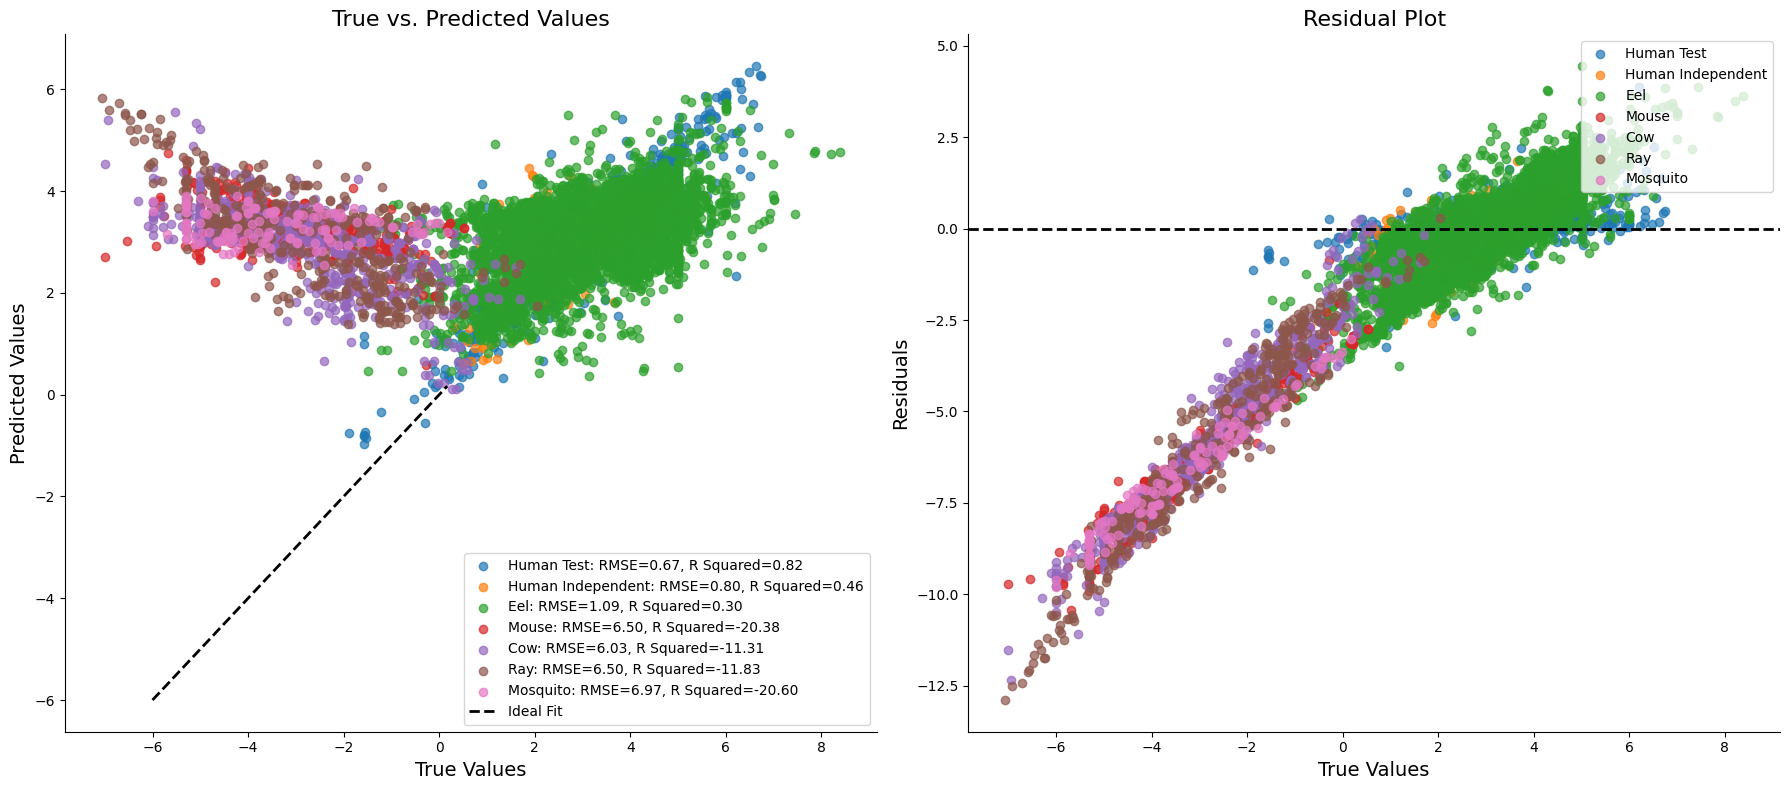

Evaluation for Human Test dataset:
MSE: 0.4496
RMSE: 0.6705
MAE: 0.4458
R2: 0.8173
Evaluation for Human Independent dataset:
MSE: 0.6472
RMSE: 0.8045
MAE: 0.6089
R2: 0.4595
Evaluation for Eel dataset:
MSE: 1.1974
RMSE: 1.0943
MAE: 0.8537
R2: 0.3050
Evaluation for Mouse dataset:
MSE: 42.2357
RMSE: 6.4989
MAE: 6.2848
R2: -20.3812
Evaluation for Cow dataset:
MSE: 36.3015
RMSE: 6.0251
MAE: 5.5624
R2: -11.3126
Evaluation for Ray dataset:
MSE: 42.2500
RMSE: 6.5000
MAE: 5.9469
R2: -11.8306
Evaluation for Mosquito dataset:
MSE: 48.6101
RMSE: 6.9721
MAE: 6.7948
R2: -20.5974

Combined Evaluation Metrics:
                         MSE      RMSE       MAE         R2
Human Test          0.449590  0.670514  0.445830   0.817325
Human Independent   0.647210  0.804494  0.608852   0.459530
Eel                 1.197384  1.094251  0.853706   0.304991
Mouse              42.235656  6.498897  6.284817 -20.381159
Cow                36.301465  6.025070  5.562398 -11.312598
Ray                42.249963  6.499997

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

datasets = {
    'Human Test': test_df_optimized,
    'Human Independent': df_humanIndependent_optimized_final,
    'Eel': df_eel_optimized_final,
    'Mouse': df_mouse_optimized_final,
    'Cow': df_cow_optimized_final,
    'Ray': df_ray_optimized_final,
    'Mosquito': df_mosquito_optimized_final
}

# Initialize a dictionary to store evaluation metrics for each dataset
evaluation_metrics = {}

# Set up the plot
fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(18, 8))

# Plot y_pred vs. y_true
ax = axs[0]
for species, data in datasets.items():
    X = data.loc[:, 'MaxEStateIndex':]
    feature_names = X.columns.tolist()
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X)
    y = data['pIC50']

    # Predict on the test set using the pre-fitted model
    y_pred = best_model.predict(X_scaled)

    # Calculate evaluation metrics
    mse = mean_squared_error(y, y_pred)
    rmse = np.sqrt(mse)
    mae = mean_absolute_error(y, y_pred)
    r2 = r2_score(y, y_pred)

    # Store metrics in the evaluation_metrics dictionary
    evaluation_metrics[species] = {
        'MSE': mse,
        'RMSE': rmse,
        'MAE': mae,
        'R2': r2
    }

    # Plot y_pred vs. y_true
    ax.scatter(y, y_pred, label=f'{species}: RMSE={rmse:.2f}, R Squared={r2:.2f}', alpha=0.7)

ax.plot([y.min(), y.max()], [y.min(), y.max()], 'k--', lw=2, label='Ideal Fit')  # No label for fit line
ax.set_xlabel('True Values', fontsize=14)
ax.set_ylabel('Predicted Values', fontsize=14)
ax.set_title('True vs. Predicted Values', fontsize=16)
ax.legend(loc='lower right', fontsize=10)
ax.grid(False)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

# Plot residual plot
ax = axs[1]
for species, data in datasets.items():
    X = data.loc[:, 'MaxEStateIndex':]
    feature_names = X.columns.tolist()
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X)
    y = data['pIC50']

    # Predict on the test set using the pre-fitted model
    y_pred = best_model.predict(X_scaled)

    # Plot residual plot
    residuals = y - y_pred
    ax.scatter(y, residuals, label=f'{species}', alpha=0.7)

ax.axhline(y=0, color='k', linestyle='--', linewidth=2)
ax.set_xlabel('True Values', fontsize=14)
ax.set_ylabel('Residuals', fontsize=14)
ax.set_title('Residual Plot', fontsize=16)
ax.legend(loc='upper right', fontsize=10)
ax.grid(False)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

plt.tight_layout()
plt.savefig('all_species_plots.png', dpi=300)
plt.show()

# Create a list to store all evaluation metrics dataframes
all_metrics_dfs = []

for species, metrics in evaluation_metrics.items():
    print(f"Evaluation for {species} dataset:")
    for metric_name, value in metrics.items():
        print(f"{metric_name}: {value:.4f}")

    # Create a dataframe for each species' metrics
    metrics_df = pd.DataFrame(metrics, index=[species])
    all_metrics_dfs.append(metrics_df)

# Concatenate all metrics dataframes into a single dataframe
all_metrics_combined = pd.concat(all_metrics_dfs)

# Save the combined metrics dataframe to an Excel file
all_metrics_combined.to_excel('evaluation_metrics_combined_tpot.xlsx')

# Display the combined metrics dataframe
print("\nCombined Evaluation Metrics:")
print(all_metrics_combined)


In [ ]:
joblib.dump(best_pipeline, 'bestPipeline_rdkit_tpot_regression.pkl')
joblib.dump(best_model, 'bestModel_rdkit_aggregrate_regression.pkl')

['bestModel_rdkit_aggregrate_regression.pkl']